# Import the libraries

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import scikit_posthocs as sp
import scipy.stats as ss
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_rel

# Processability of dataframes

Creating a dataframe which indicates whether or not each dataset was processed by a given framework

In [2]:
# Paths to the pickle files
Base_path = '../Data/BASIC'
BigFeat_path = '../Data/BIGFEAT'
AutoFeat_path = '../Data/AUTOFEAT'
FT_path = '../Data/FT'
Open_path = '../Data/OPENFE'
SAFE_path = '../Data/SAFE'

def check_file_exists(path, file_name):
    """Check if a file exists in the given path."""
    return "Yes" if file_name in os.listdir(path) else "No"

# Get all file names in the base path
base_files = os.listdir(Base_path)

# Creating a DataFrame
df = pd.DataFrame(base_files, columns=['DataFrame'])

# Check presence of each file in other directories and fill the DataFrame
df['AutoFeat'] = df['DataFrame'].apply(lambda x: check_file_exists(AutoFeat_path, x))
df['BigFeat'] = df['DataFrame'].apply(lambda x: check_file_exists(BigFeat_path, x))
df['OpenFE'] = df['DataFrame'].apply(lambda x: check_file_exists(Open_path, x))
df['SAFE'] = df['DataFrame'].apply(lambda x: check_file_exists(SAFE_path, x))
df['Feature Tools'] = df['DataFrame'].apply(lambda x: check_file_exists(FT_path, x))

# Remove the last 14 characters from each value in the 'DataFrame' column
df['DataFrame'] = df['DataFrame'].str[:-14]

Seperating the regression and classification results

In [3]:
regression_datasets = [ 'fri_c3_1000_50', 'fri_c2_1000_25', 'fri_c4_500_50', 'fri_c4_1000_50', 'fri_c1_1000_25', 'fri_c1_500_50', 'fri_c3_1000_25', 'auto93', 'pyrim', 'autoPrice', 'boston', 'Concrete_Compressive_Strength', 'Auto_MPG', 'Forest Fires', 'Servo', 'Airfoil_Self_Noise', 'Wine_Quality', 'BodyFat', 'California_Housing', 'Quake']
regression_df = df[df['DataFrame'].isin(regression_datasets)]
classification_df = df[~df['DataFrame'].isin(regression_datasets)]

Graphical summary showing the overall processability of datasets

C:\Users\25644574\AppData\Local\Temp\ipykernel_13972\95125730.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(x)}%' for x in ax.get_yticks()], fontsize=12)  # Setting y-tick labels with percentage sign


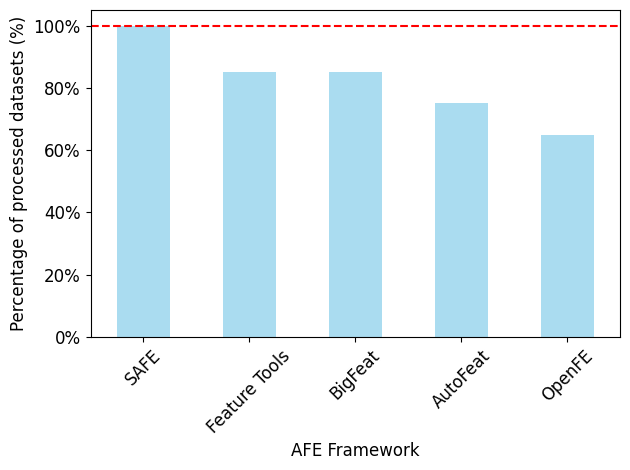

In [4]:
# Calculate the percentage of 'Yes' for each framework
percentages = classification_df[['AutoFeat', 'BigFeat', 'OpenFE', 'SAFE', 'Feature Tools']].apply(lambda x: (x == 'Yes').mean() * 100)

# Sort the percentages from highest to lowest
percentages_sorted = percentages.sort_values(ascending=False)

# Create a bar chart
fig, ax = plt.subplots()
percentages_sorted.plot(kind='bar', ax=ax, color='skyblue', alpha=0.7)

# Add labels and title with specific font sizes
ax.set_ylabel('Percentage of processed datasets (%)', fontsize=12)
ax.set_xlabel('AFE Framework', fontsize=12)
ax.set_xticklabels(percentages_sorted.index, rotation=45, fontsize=12)
ax.set_yticklabels([f'{int(x)}%' for x in ax.get_yticks()], fontsize=12)  # Setting y-tick labels with percentage sign

# Draw a dotted line at 100%
ax.axhline(y=100, color='r', linestyle='--')

# Adjust layout to make room for tick labels
plt.tight_layout()

# Save the figure
plt.savefig('../Diagrams/fig1_A.pdf', format='pdf', bbox_inches='tight')

plt.show()

C:\Users\25644574\AppData\Local\Temp\ipykernel_13972\1728599484.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(x)}%' for x in ax.get_yticks()], fontsize=12)  # Setting y-tick labels with percentage sign


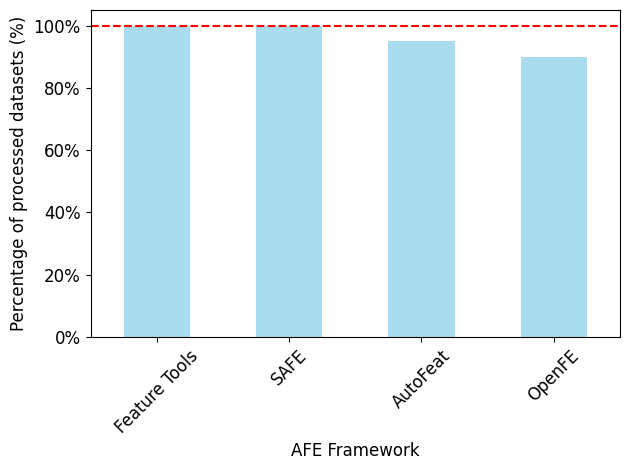

In [5]:
# Calculate the percentage of 'Yes' for each framework
percentages = regression_df[['AutoFeat', 'OpenFE', 'SAFE', 'Feature Tools']].apply(lambda x: (x == 'Yes').mean() * 100)

# Sort the percentages from highest to lowest
percentages_sorted = percentages.sort_values(ascending=False)

# Create a bar chart
fig, ax = plt.subplots()
percentages_sorted.plot(kind='bar', ax=ax, color='skyblue', alpha=0.7)

# Add labels and title with specific font sizes
ax.set_ylabel('Percentage of processed datasets (%)', fontsize=12)
ax.set_xlabel('AFE Framework', fontsize=12)
ax.set_xticklabels(percentages_sorted.index, rotation=45, fontsize=12)
ax.set_yticklabels([f'{int(x)}%' for x in ax.get_yticks()], fontsize=12)  # Setting y-tick labels with percentage sign

# Draw a dotted line at 100%
ax.axhline(y=100, color='r', linestyle='--')

# Adjust layout to make room for tick labels
plt.tight_layout()

# Save the figure
plt.savefig('../Diagrams/fig1_B.pdf', format='pdf', bbox_inches='tight')

plt.show()

# Explosion of the feature space

Writing a function to find the average number of columns

In [6]:
def average_columns_in_dataframes(path,framework):
    # List to store the dataframe names and their average number of columns
    results = []
    
    # List all files in the specified directory
    files = [f for f in os.listdir(path) if f.endswith('.pkl')]
    
    # Process each file
    for file in files:
        # Construct the full file path
        file_path = os.path.join(path, file)
        
        # Load the pickle file
        with open(file_path, 'rb') as handle:
            data = pickle.load(handle)
        
        # List to store the number of columns for each fold
        num_columns = []
        
        # Iterate over each fold and extract the number of columns
        for fold in ['fold1', 'fold2', 'fold3', 'fold4', 'fold5']:
            # Extract the dataframe from the current fold
            df = data[fold]['Training_Independent']
            # Append the number of columns in this dataframe to the list
            num_columns.append(df.shape[1])
        
        # Calculate the average number of columns across the folds
        average_cols = sum(num_columns) / len(num_columns)
        
        # Append the result to the results list
        results.append([file, average_cols])
    
    # Create a DataFrame to hold the results
    cols = pd.DataFrame(results, columns=['Dataframe', f'{framework}'])
    
    return cols

Creating a dataframe indicating the average number of columns

In [7]:
# Paths to the pickle files
Base_path = '../Data/BASIC'
BigFeat_path = '../Data/BIGFEAT'
AutoFeat_path = '../Data/AUTOFEAT'
FT_path = '../Data/FT'
Open_path = '../Data/OPENFE'
SAFE_path = '../Data/SAFE'

#Creating the dataframes of columns
base_cols = average_columns_in_dataframes(Base_path,'Base')
bigfeat_cols = average_columns_in_dataframes(BigFeat_path,'BigFeat')
autofeat_cols = average_columns_in_dataframes(AutoFeat_path,'AutoFeat')
FT_cols = average_columns_in_dataframes(FT_path,'FT')
Open_cols = average_columns_in_dataframes(Open_path,'OpenFE')
SAFE_cols = average_columns_in_dataframes(SAFE_path,'SAFE')

# Sequentially merge all dataframes on 'Dataframe'
merged_df_cols = base_cols
merged_df_cols = pd.merge(merged_df_cols, bigfeat_cols, on=['Dataframe'], how='left')
merged_df_cols = pd.merge(merged_df_cols, autofeat_cols, on=['Dataframe'], how='left')
merged_df_cols = pd.merge(merged_df_cols, FT_cols, on=['Dataframe'], how='left')
merged_df_cols = pd.merge(merged_df_cols, Open_cols, on=['Dataframe'], how='left')
merged_df_cols = pd.merge(merged_df_cols, SAFE_cols, on=['Dataframe'], how='left')

# Remove the last 14 characters from each value in the 'DataFrame' column
merged_df_cols['Dataframe'] = merged_df_cols['Dataframe'].str[:-14]

Seperate the regression and classification datasets

In [8]:
regression_df = merged_df_cols[merged_df_cols['Dataframe'].isin(regression_datasets)]
classification_df = merged_df_cols[~merged_df_cols['Dataframe'].isin(regression_datasets)]

Plotting a graph of the average number of columns

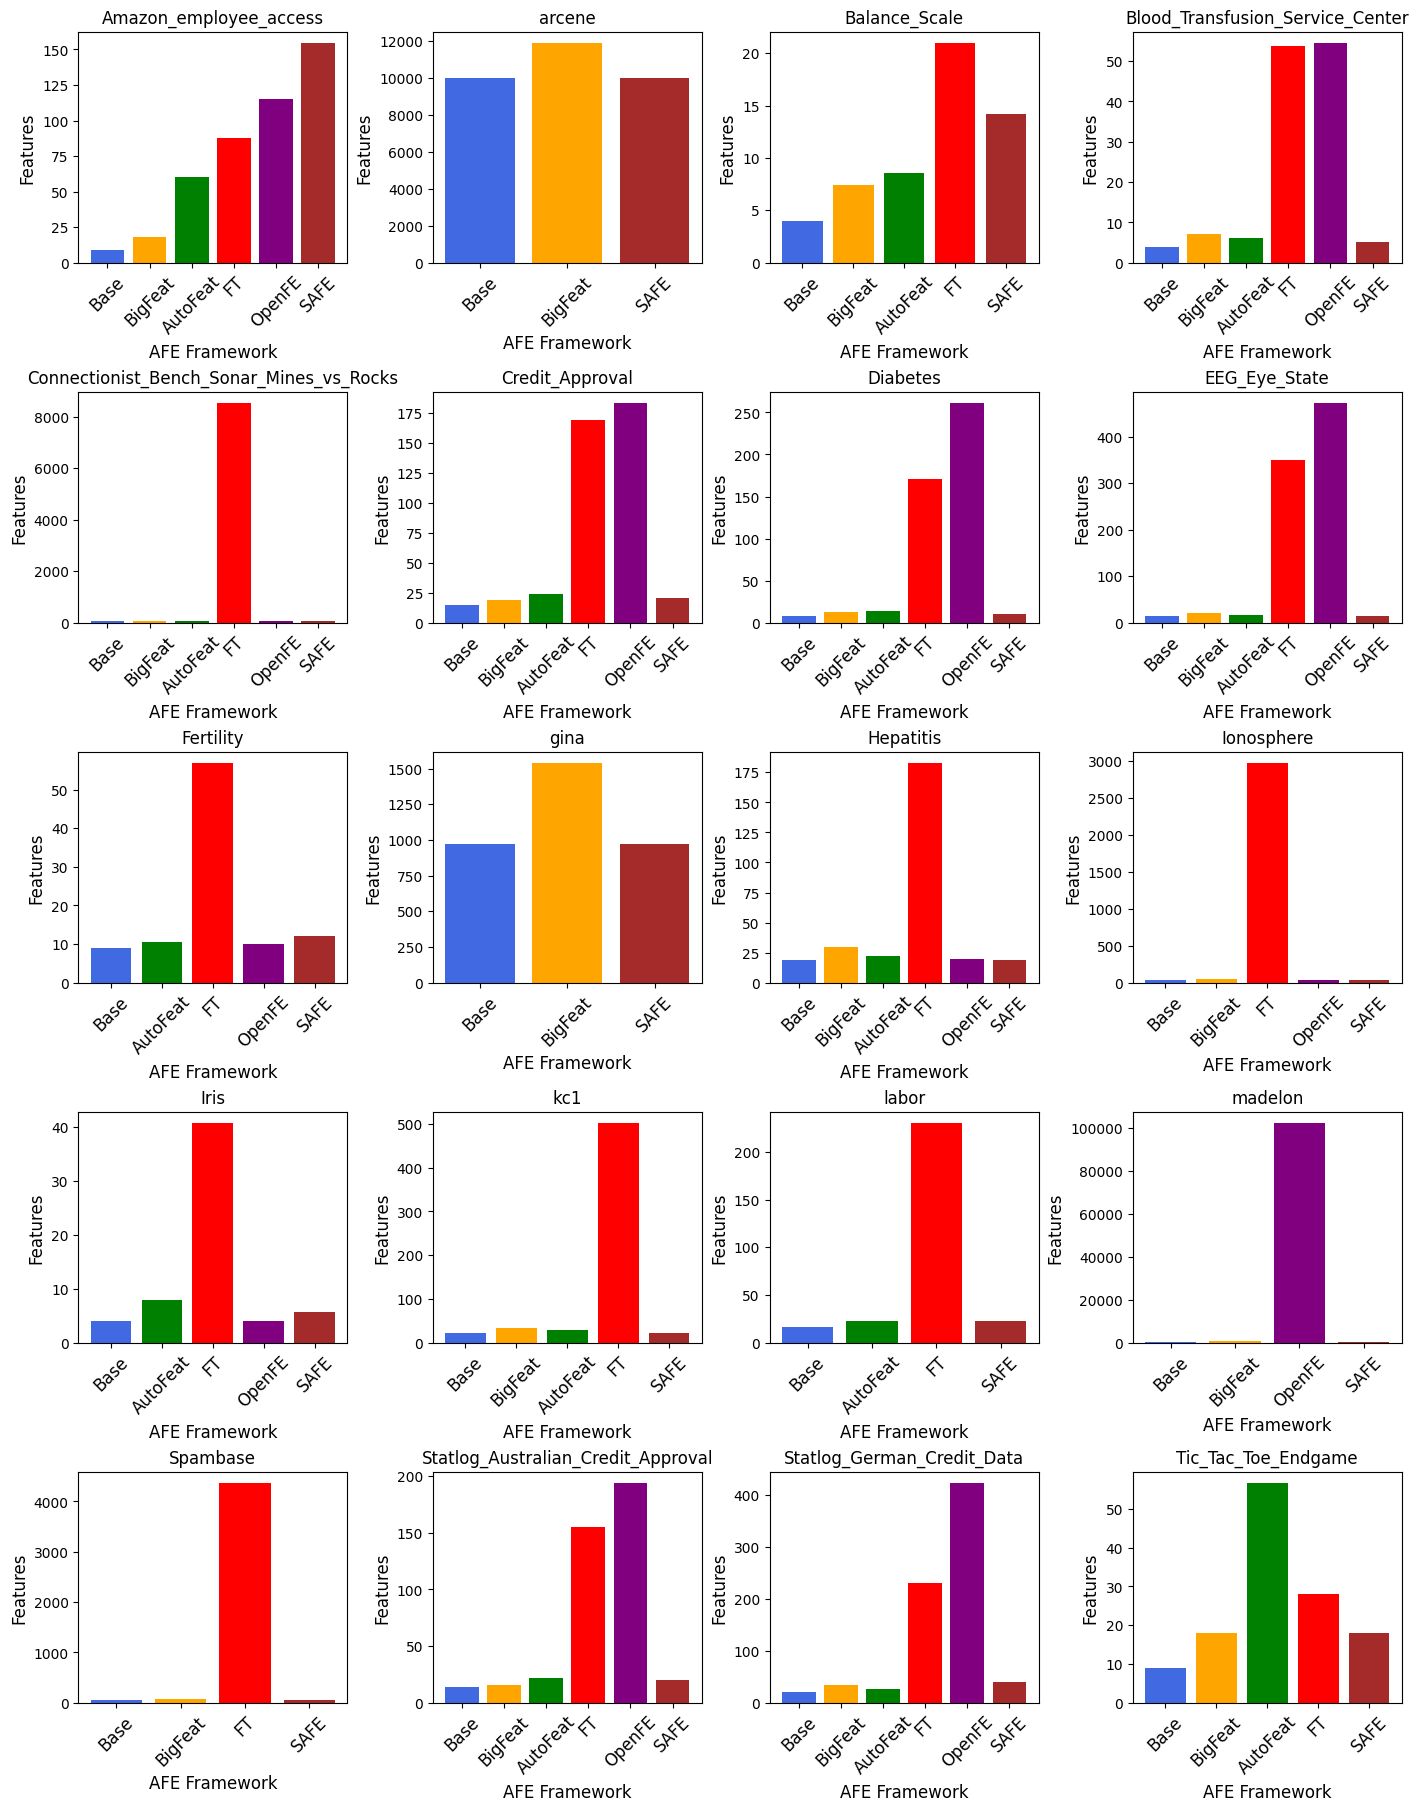

In [9]:
# Define a color map for the feature engineering methods
colors = {
    'Base': 'royalblue',
    'BigFeat': 'orange',
    'AutoFeat': 'green',
    'FT': 'red',
    'OpenFE': 'purple',
    'SAFE': 'brown'
}

# Create the 7x6 grid of plots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(14, 18), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each dataframe row in its own subplot
for i, (idx, row) in enumerate(classification_df.iterrows()):
    ax = axes[i]
    valid_columns = [col for col in classification_df.columns[1:] if not np.isnan(row[col])]
    valid_colors = [colors[col] for col in valid_columns]  # Extract colors for valid columns only
    valid_values = [row[col] for col in valid_columns]     # Extract values for valid columns only
    
    # Plotting the bar chart with color mapping
    ax.bar(valid_columns, valid_values, color=valid_colors)
    ax.set_title(row['Dataframe'], fontsize=12)
    ax.set_xticks(range(len(valid_columns)))
    ax.set_xticklabels(valid_columns, rotation=45, fontsize=12)
    ax.set_ylabel('Features', fontsize=12)
    ax.set_xlabel('AFE Framework', fontsize=12)

# Hide any unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Save the figure as a PDF
plt.savefig('../Diagrams/fig2_A.pdf', bbox_inches='tight')

plt.show()


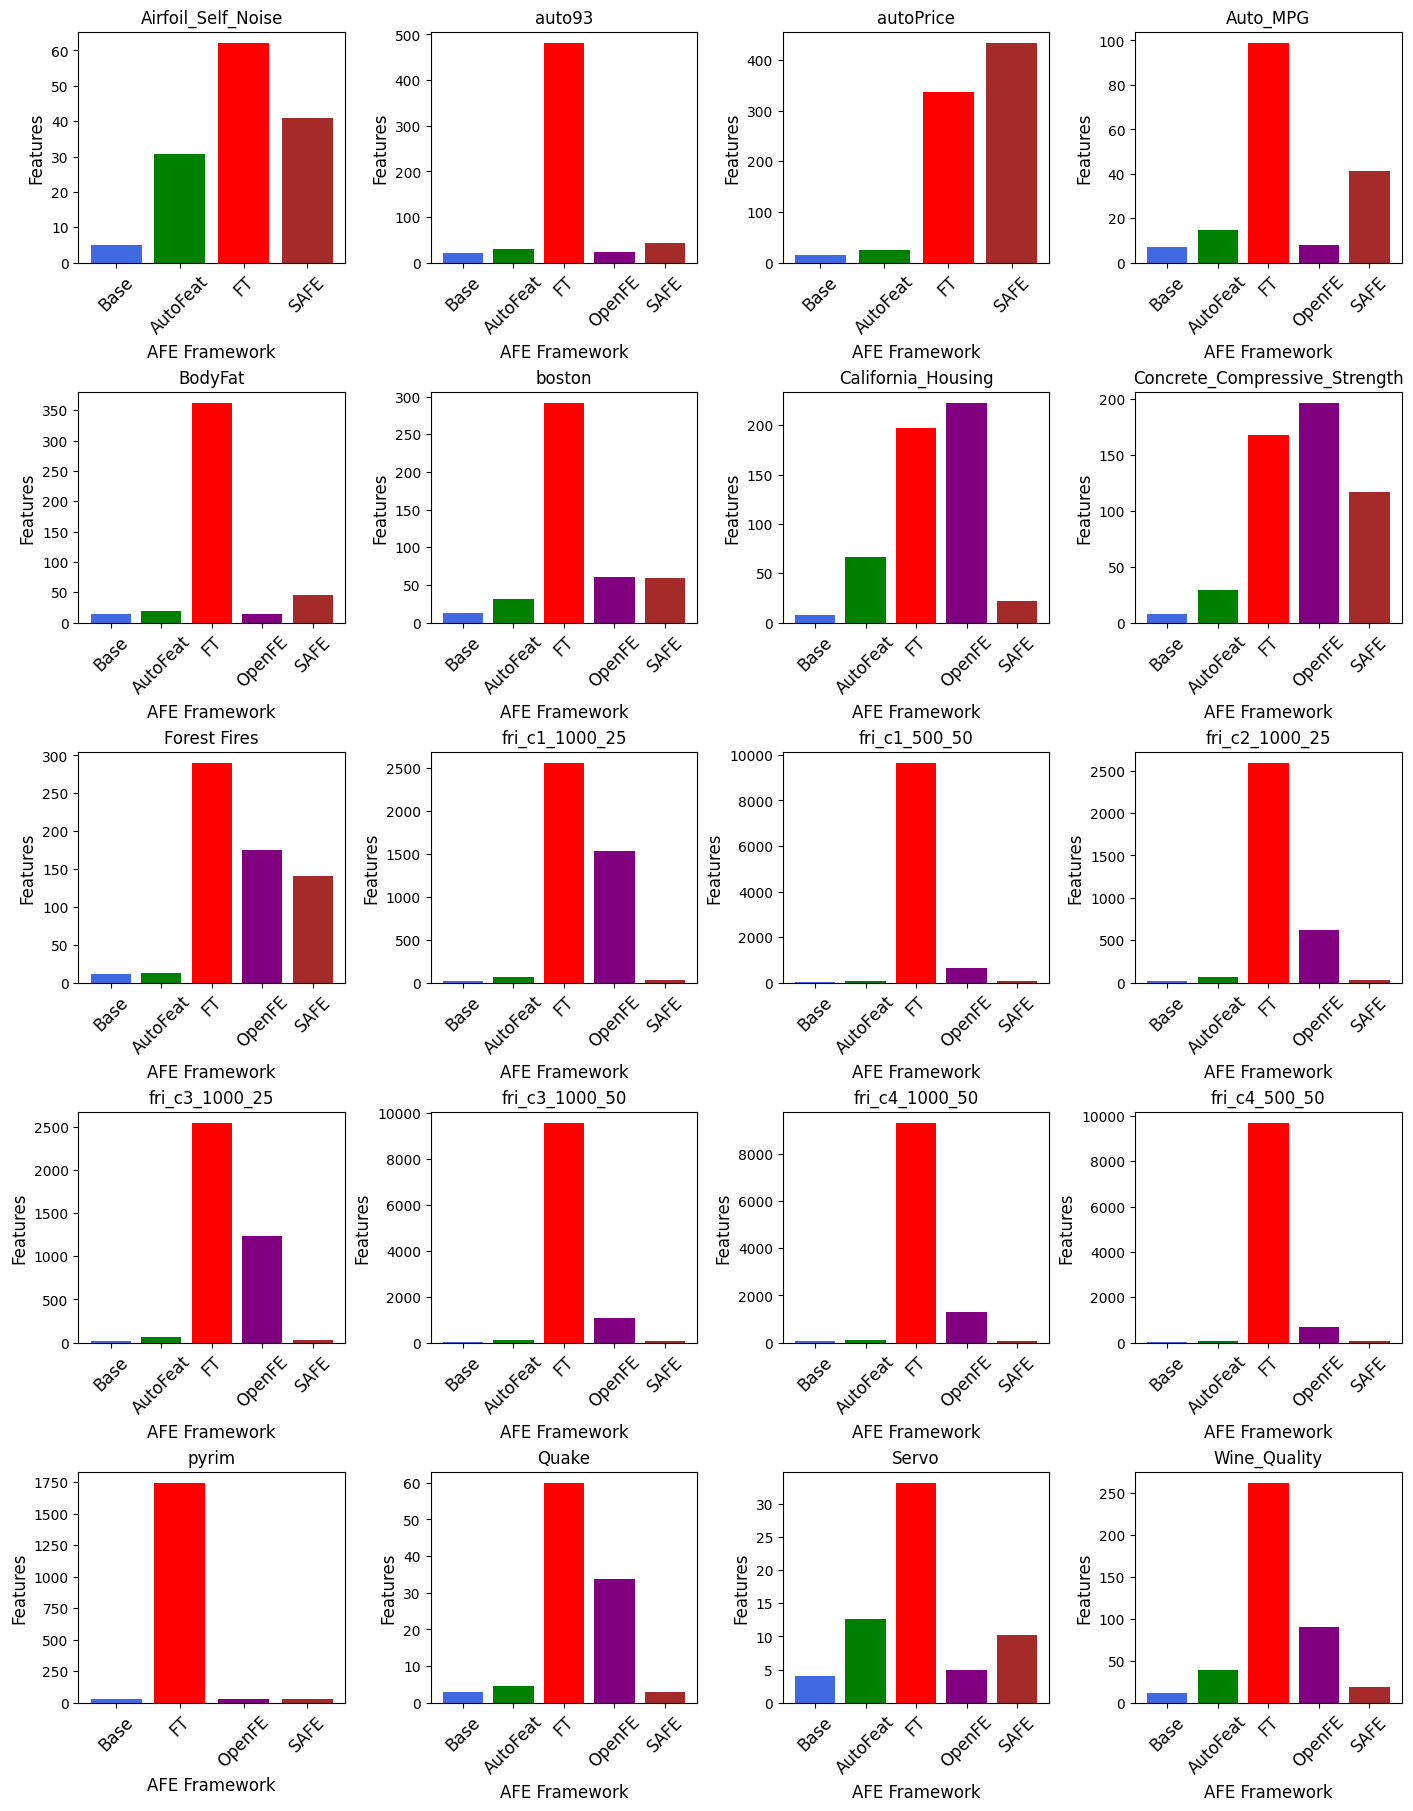

In [10]:
# Define a color map for the feature engineering methods
colors = {
    'Base': 'royalblue',
    'BigFeat': 'orange',
    'AutoFeat': 'green',
    'FT': 'red',
    'OpenFE': 'purple',
    'SAFE': 'brown'
}

# Create the 7x6 grid of plots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(14, 18), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each dataframe row in its own subplot
for i, (idx, row) in enumerate(regression_df.iterrows()):
    ax = axes[i]
    valid_columns = [col for col in regression_df.columns[1:] if not np.isnan(row[col])]
    valid_colors = [colors[col] for col in valid_columns]  # Extract colors for valid columns only
    valid_values = [row[col] for col in valid_columns]     # Extract values for valid columns only
    
    # Plotting the bar chart with color mapping
    ax.bar(valid_columns, valid_values, color=valid_colors)
    ax.set_title(row['Dataframe'], fontsize=12)
    ax.set_xticks(range(len(valid_columns)))
    ax.set_xticklabels(valid_columns, rotation=45, fontsize=12)
    ax.set_ylabel('Features', fontsize=12)
    ax.set_xlabel('AFE Framework', fontsize=12)

# Hide any unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Save the figure as a PDF
plt.savefig('../Diagrams/fig2_B.pdf', bbox_inches='tight')

plt.show()


Finding the average relative increase - Classification

In [11]:
# Drop rows with NaN values
merged_df_cols_cleaned = classification_df.dropna()

# List of frameworks to evaluate
frameworks = ['BigFeat', 'AutoFeat', 'FT', 'OpenFE', 'SAFE']

# Calculate relative increase and average it out for each framework
relative_increases = []
for fw in frameworks:
    rel_inc = ((merged_df_cols_cleaned[fw] - merged_df_cols_cleaned['Base']) / merged_df_cols_cleaned['Base']) * 100
    avg_rel_inc = rel_inc.mean()
    relative_increases.append({'Framework': fw, 'Relative Increase (%)': avg_rel_inc})

# Create a new DataFrame and sort it in ascending order
relative_increase_df = pd.DataFrame(relative_increases).sort_values(by='Relative Increase (%)', ascending=True).reset_index(drop=True)

# Display the DataFrame
print(relative_increase_df)

  Framework  Relative Increase (%)
0   BigFeat              54.158266
1  AutoFeat              97.812587
2      SAFE             206.177249
3    OpenFE            1481.498376
4        FT            2737.971688


In [12]:
# Drop rows with NaN values
merged_df_cols_cleaned = regression_df.drop(columns='BigFeat').dropna()

# List of frameworks to evaluate
frameworks = ['AutoFeat', 'FT', 'OpenFE', 'SAFE']

# Calculate relative increase and average it out for each framework
relative_increases = []
for fw in frameworks:
    rel_inc = ((merged_df_cols_cleaned[fw] - merged_df_cols_cleaned['Base']) / merged_df_cols_cleaned['Base']) * 100
    avg_rel_inc = rel_inc.mean()
    relative_increases.append({'Framework': fw, 'Relative Increase (%)': avg_rel_inc})

# Create a new DataFrame and sort it in ascending order
relative_increase_df = pd.DataFrame(relative_increases).sort_values(by='Relative Increase (%)', ascending=True).reset_index(drop=True)

# Display the DataFrame
print(relative_increase_df)

  Framework  Relative Increase (%)
0  AutoFeat             161.491029
1      SAFE             243.441562
2    OpenFE            1692.087201
3        FT            7425.250914


# Creating tables of metrics

Getting the dataframes ready

In [13]:
# Paths to the pickle files
Base_path = '../Results/Base_Results.pkl'
BigFeat_path = '../Results/BigFeat_results.pkl'
AutoFeat_path = '../Results/AutoFeat_results.pkl'
FT_path = '../Results/FT_Results.pkl'
Open_path = '../Results/OpenFE_Results.pkl'
SAFE_path = '../Results/SAFE_Results.pkl'

# Load the data
with open(Base_path, 'rb') as f:
    Base = pickle.load(f)

with open(BigFeat_path, 'rb') as f:
    BigFeat = pickle.load(f)

with open(AutoFeat_path, 'rb') as f:
    AutoFeat = pickle.load(f)

with open(FT_path, 'rb') as f:
    FeatureTools = pickle.load(f)

with open(Open_path, 'rb') as f:
    OpenFE = pickle.load(f)

with open(SAFE_path, 'rb') as f:
    SAFE = pickle.load(f)

# Function to standardize and rename columns with the appropriate suffix
def standardize_rename_columns(df, suffix):
    # Add suffix to the metric columns if there is any suffix provided
    if suffix:
        df = df.rename(columns={col: f"{col}_{suffix}" if col != 'Dataframe' and col != 'Model' else col for col in df.columns})
    return df

# Applying the renaming function to each DataFrame
Base['classification_df'] = standardize_rename_columns(Base['classification_df'], '')
BigFeat['classification_df'] = standardize_rename_columns(BigFeat['classification_df'], 'BigFeat')
AutoFeat['classification_df'] = standardize_rename_columns(AutoFeat['classification_df'], 'AutoFeat')
FeatureTools['classification_df'] = standardize_rename_columns(FeatureTools['classification_df'], 'FeatureTools')
OpenFE['classification_df'] = standardize_rename_columns(OpenFE['classification_df'], 'OpenFE')
SAFE['classification_df'] = standardize_rename_columns(SAFE['classification_df'], 'SAFE')

# Now all DataFrames should have standardized and properly renamed columns as specified.

# Sequentially merge all dataframes on 'Dataframe' and 'Model' columns
merged_df = Base['classification_df']
merged_df = pd.merge(merged_df, BigFeat['classification_df'], on=['Dataframe', 'Model'], how='left')
merged_df = pd.merge(merged_df, AutoFeat['classification_df'], on=['Dataframe', 'Model'], how='left')
merged_df = pd.merge(merged_df, FeatureTools['classification_df'], on=['Dataframe', 'Model'], how='left')
merged_df = pd.merge(merged_df, OpenFE['classification_df'], on=['Dataframe', 'Model'], how='left')
merged_df = pd.merge(merged_df, SAFE['classification_df'], on=['Dataframe', 'Model'], how='left')

# Now merged_df contains all the information, with columns from each framework only if they match the 'Dataframe' and 'Model' in Base['classification_df']

# Function to standardize and rename columns with the appropriate suffix for regression
def standardize_rename_columns(df, suffix):
    # Standard metric columns
    metric_columns = ['NMAE', 'R2']
    # Rename columns by appending the suffix if not the base dataframe
    return df.rename(columns={col: f"{col}_{suffix}" if col in metric_columns else col for col in df.columns})

# Base regression dataframe remains unchanged
Base['regression_df'] = Base['regression_df']

# Renaming columns in the other regression dataframes
AutoFeat['regression_df'] = standardize_rename_columns(AutoFeat['regression_df'], 'AutoFeat')
OpenFE['regression_df'] = standardize_rename_columns(OpenFE['regression_df'], 'OpenFE')
FeatureTools['regression_df'] = standardize_rename_columns(FeatureTools['regression_df'], 'FeatureTools')
SAFE['regression_df'] = standardize_rename_columns(SAFE['regression_df'], 'SAFE')

# Sequentially merge all dataframes on 'Dataframe' and 'Model' columns
merged_df_regression = Base['regression_df']
merged_df_regression = pd.merge(merged_df_regression, AutoFeat['regression_df'], on=['Dataframe', 'Model'], how='left')
merged_df_regression = pd.merge(merged_df_regression, FeatureTools['regression_df'], on=['Dataframe', 'Model'], how='left')
merged_df_regression = pd.merge(merged_df_regression, OpenFE['regression_df'], on=['Dataframe', 'Model'], how='left')
merged_df_regression = pd.merge(merged_df_regression, SAFE['regression_df'], on=['Dataframe', 'Model'], how='left')

# Now merged_df_regression contains all the information, with columns from each framework only if they match the 'Dataframe' and 'Model' in Base['regression_df']

Converting all the negative R Squared values to 0

In [14]:
# List of R2 columns in your dataframe
r2_columns = ['R2', 'R2_AutoFeat', 'R2_FeatureTools', 'R2_OpenFE', 'R2_SAFE']

# Replace negative values with 0 for each R2 column
for column in r2_columns:
    merged_df_regression[column] = np.where(merged_df_regression[column] < 0, 0, merged_df_regression[column])

Creating a copy of the dataframe

In [15]:
merged_df_copy = merged_df.copy()
merged_df__regression_copy = merged_df_regression.copy()

# Analyzing the change in performance - Bar Plots

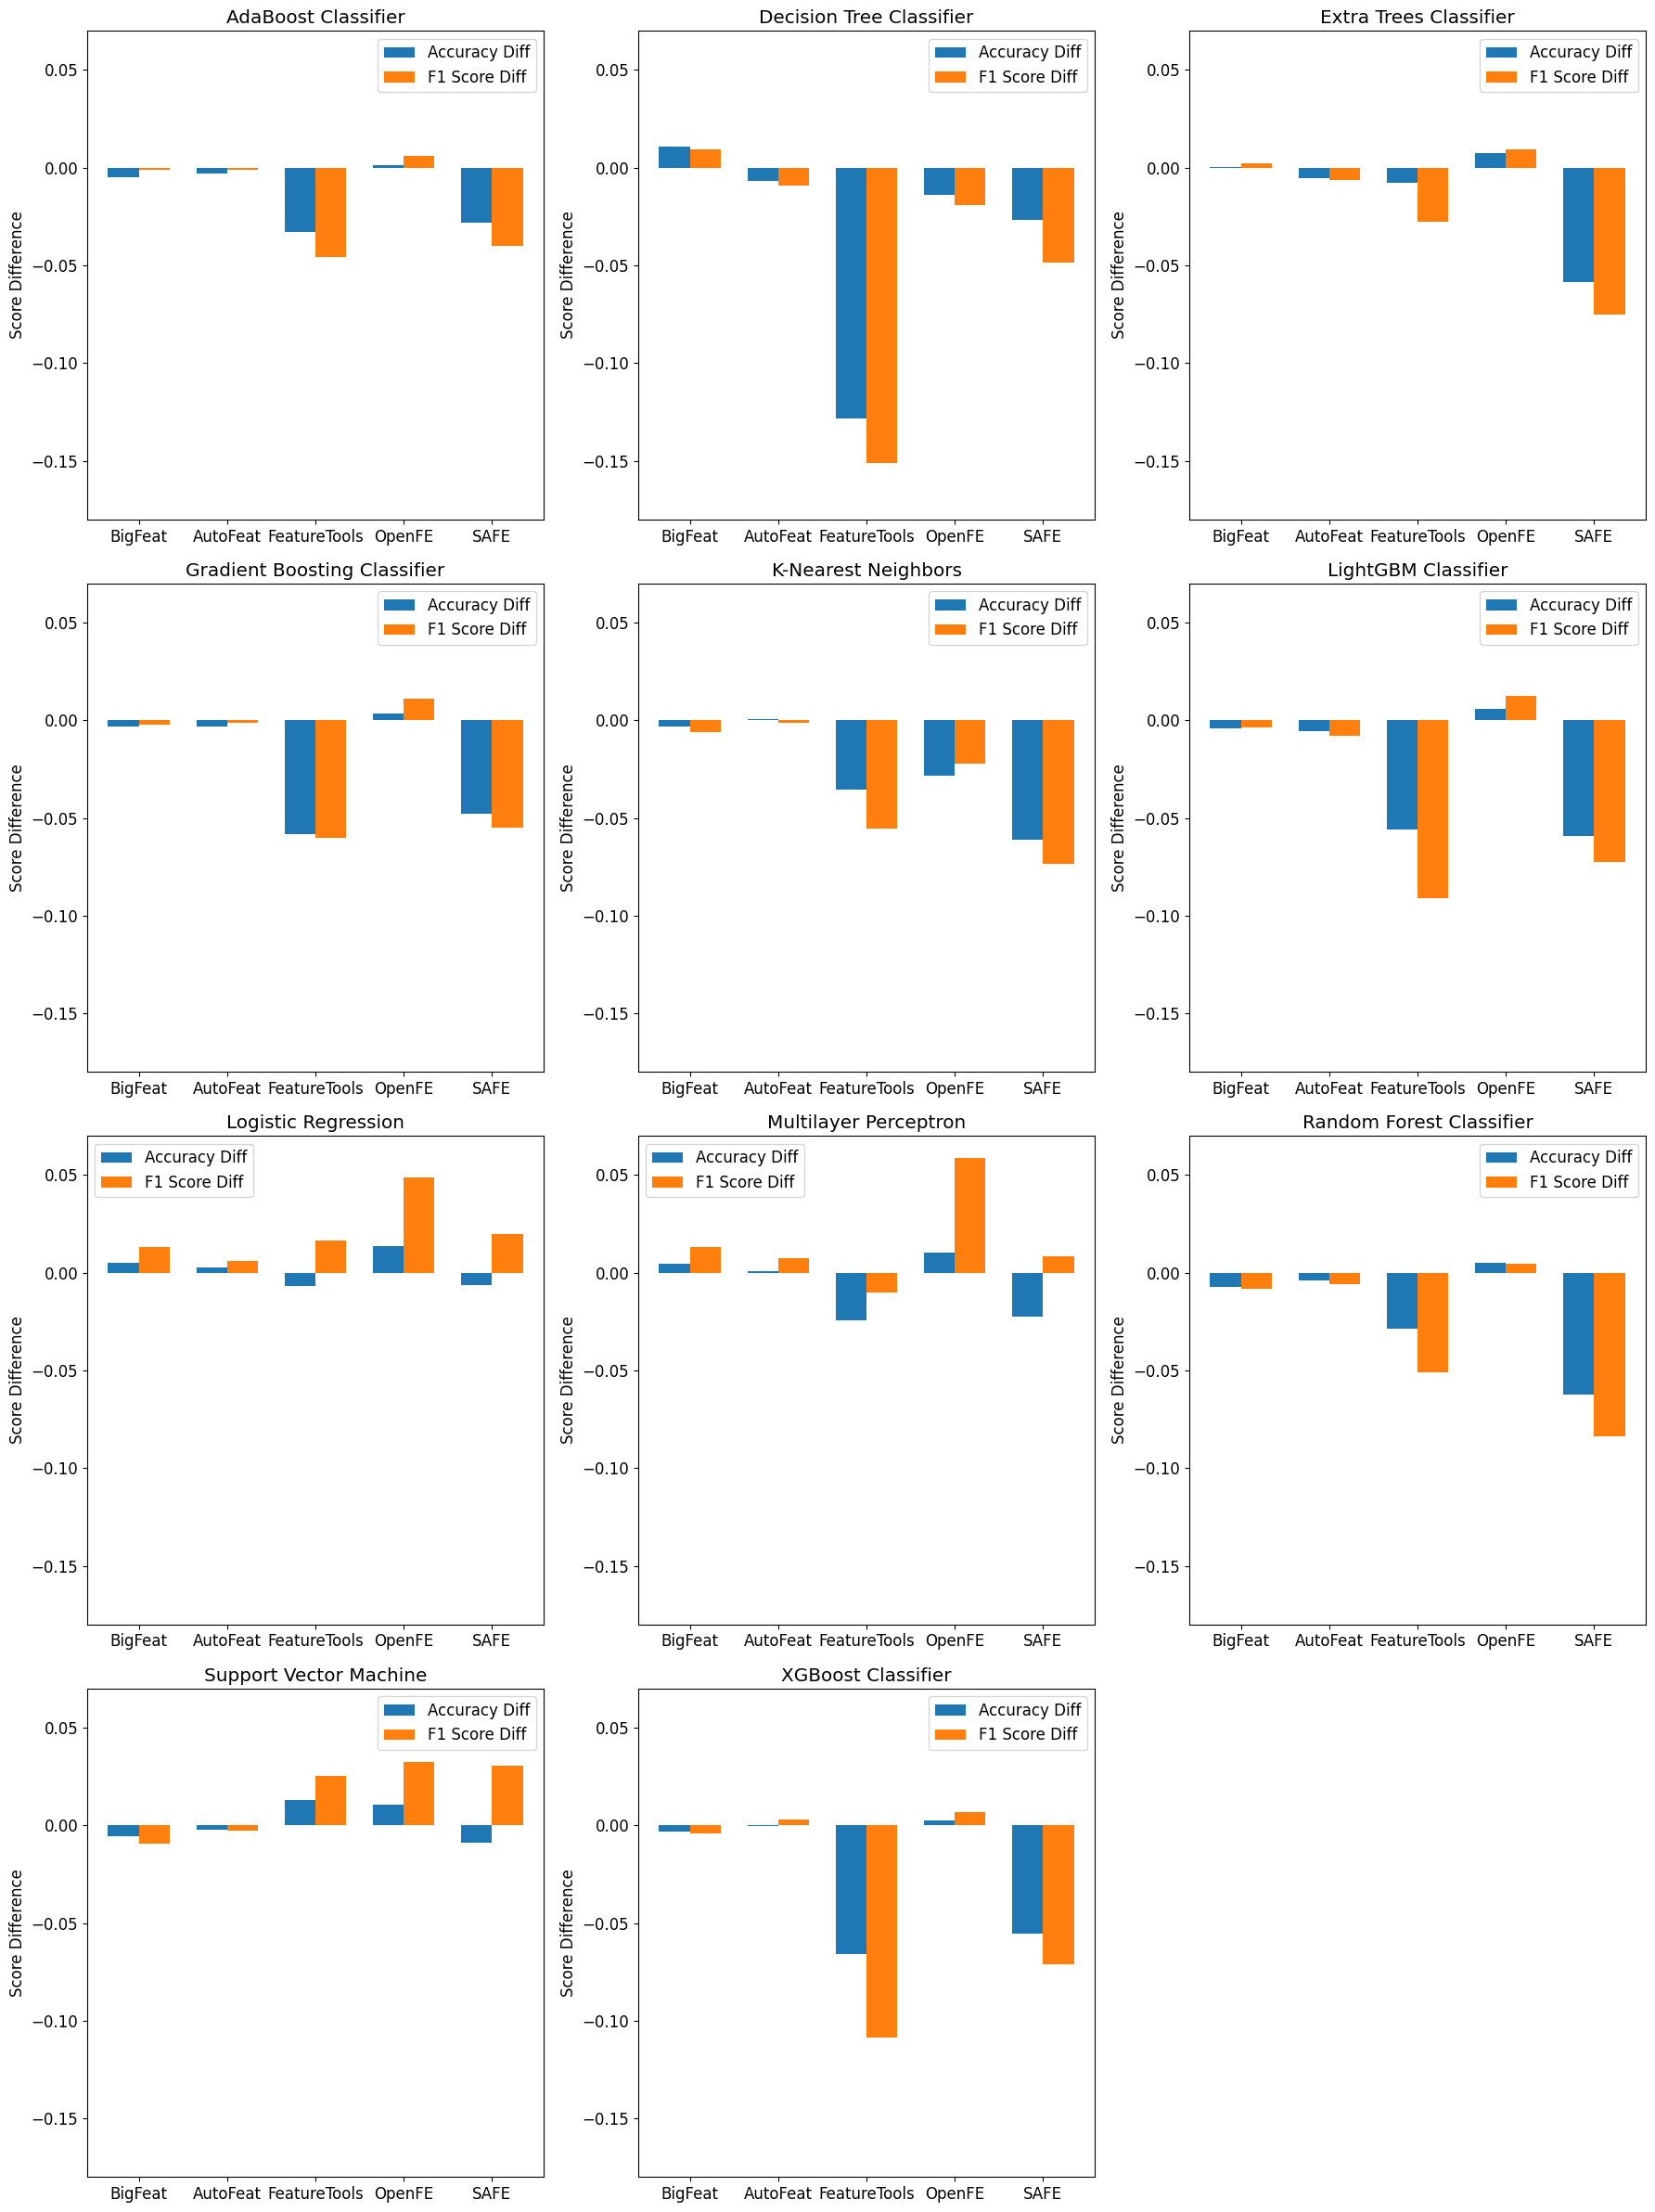

In [20]:
merged_df = merged_df_copy.copy()

# Define a dictionary to rename models
model_names = {
    'AB': 'AdaBoost Classifier',
    'DT': 'Decision Tree Classifier',
    'ET': 'Extra Trees Classifier',
    'GB': 'Gradient Boosting Classifier',
    'KNN': 'K-Nearest Neighbors',
    'LGBM': 'LightGBM Classifier',
    'LR': 'Logistic Regression',
    'MLP': 'Multilayer Perceptron',
    'RF': 'Random Forest Classifier',
    'SVM': 'Support Vector Machine',
    'XGB': 'XGBoost Classifier'
}

merged_df['Model'] = merged_df['Model'].map(model_names)  # Map abbreviations to full names

# Setup figure for subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 24))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Set all font sizes to 12
plt.rcParams.update({'font.size': 12})

# Iterate over each model to plot their respective data
for index, model in enumerate(model_names.values()):
    if index >= len(axes):
        break  # Avoid accessing axes that are not available

    # Filter the dataframe for the current model and drop any rows with NaN values
    df_model = merged_df[merged_df['Model'] == model].dropna()
    
    # Calculate the differences and then the average of differences for Accuracy and F1
    acc_diffs = {
        'BigFeat': (df_model['Accuracy_BigFeat'] - df_model['Accuracy']).mean(),
        'AutoFeat': (df_model['Accuracy_AutoFeat'] - df_model['Accuracy']).mean(),
        'FeatureTools': (df_model['Accuracy_FeatureTools'] - df_model['Accuracy']).mean(),
        'OpenFE': (df_model['Accuracy_OpenFE'] - df_model['Accuracy']).mean(),
        'SAFE': (df_model['Accuracy_SAFE'] - df_model['Accuracy']).mean()
    }
    f1_diffs = {
        'BigFeat': (df_model['F1_BigFeat'] - df_model['F1']).mean(),
        'AutoFeat': (df_model['F1_AutoFeat'] - df_model['F1']).mean(),
        'FeatureTools': (df_model['F1_FeatureTools'] - df_model['F1']).mean(),
        'OpenFE': (df_model['F1_OpenFE'] - df_model['F1']).mean(),
        'SAFE': (df_model['F1_SAFE'] - df_model['F1']).mean()
    }

    # Plotting
    labels = list(acc_diffs.keys())
    x = np.arange(len(labels))  # Label locations
    width = 0.35  # Width of the bars
    axes[index].bar(x - width/2, acc_diffs.values(), width, label='Accuracy Diff')
    axes[index].bar(x + width/2, f1_diffs.values(), width, label='F1 Score Diff')
    
    axes[index].set_ylabel('Score Difference')
    axes[index].set_title(model)  # Use the full name for the model
    axes[index].set_xticks(x)
    axes[index].set_xticklabels(labels)
    axes[index].legend()
    axes[index].set_ylim(-0.18, 0.07)  # Set uniform y-axis limits

# Hide unused subplots if there are fewer models than subplots
for i in range(len(model_names), len(axes)):
    axes[i].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('../Diagrams/fig7_A.pdf', format='pdf', bbox_inches='tight')
plt.show()


Plotting the graph for the regression models

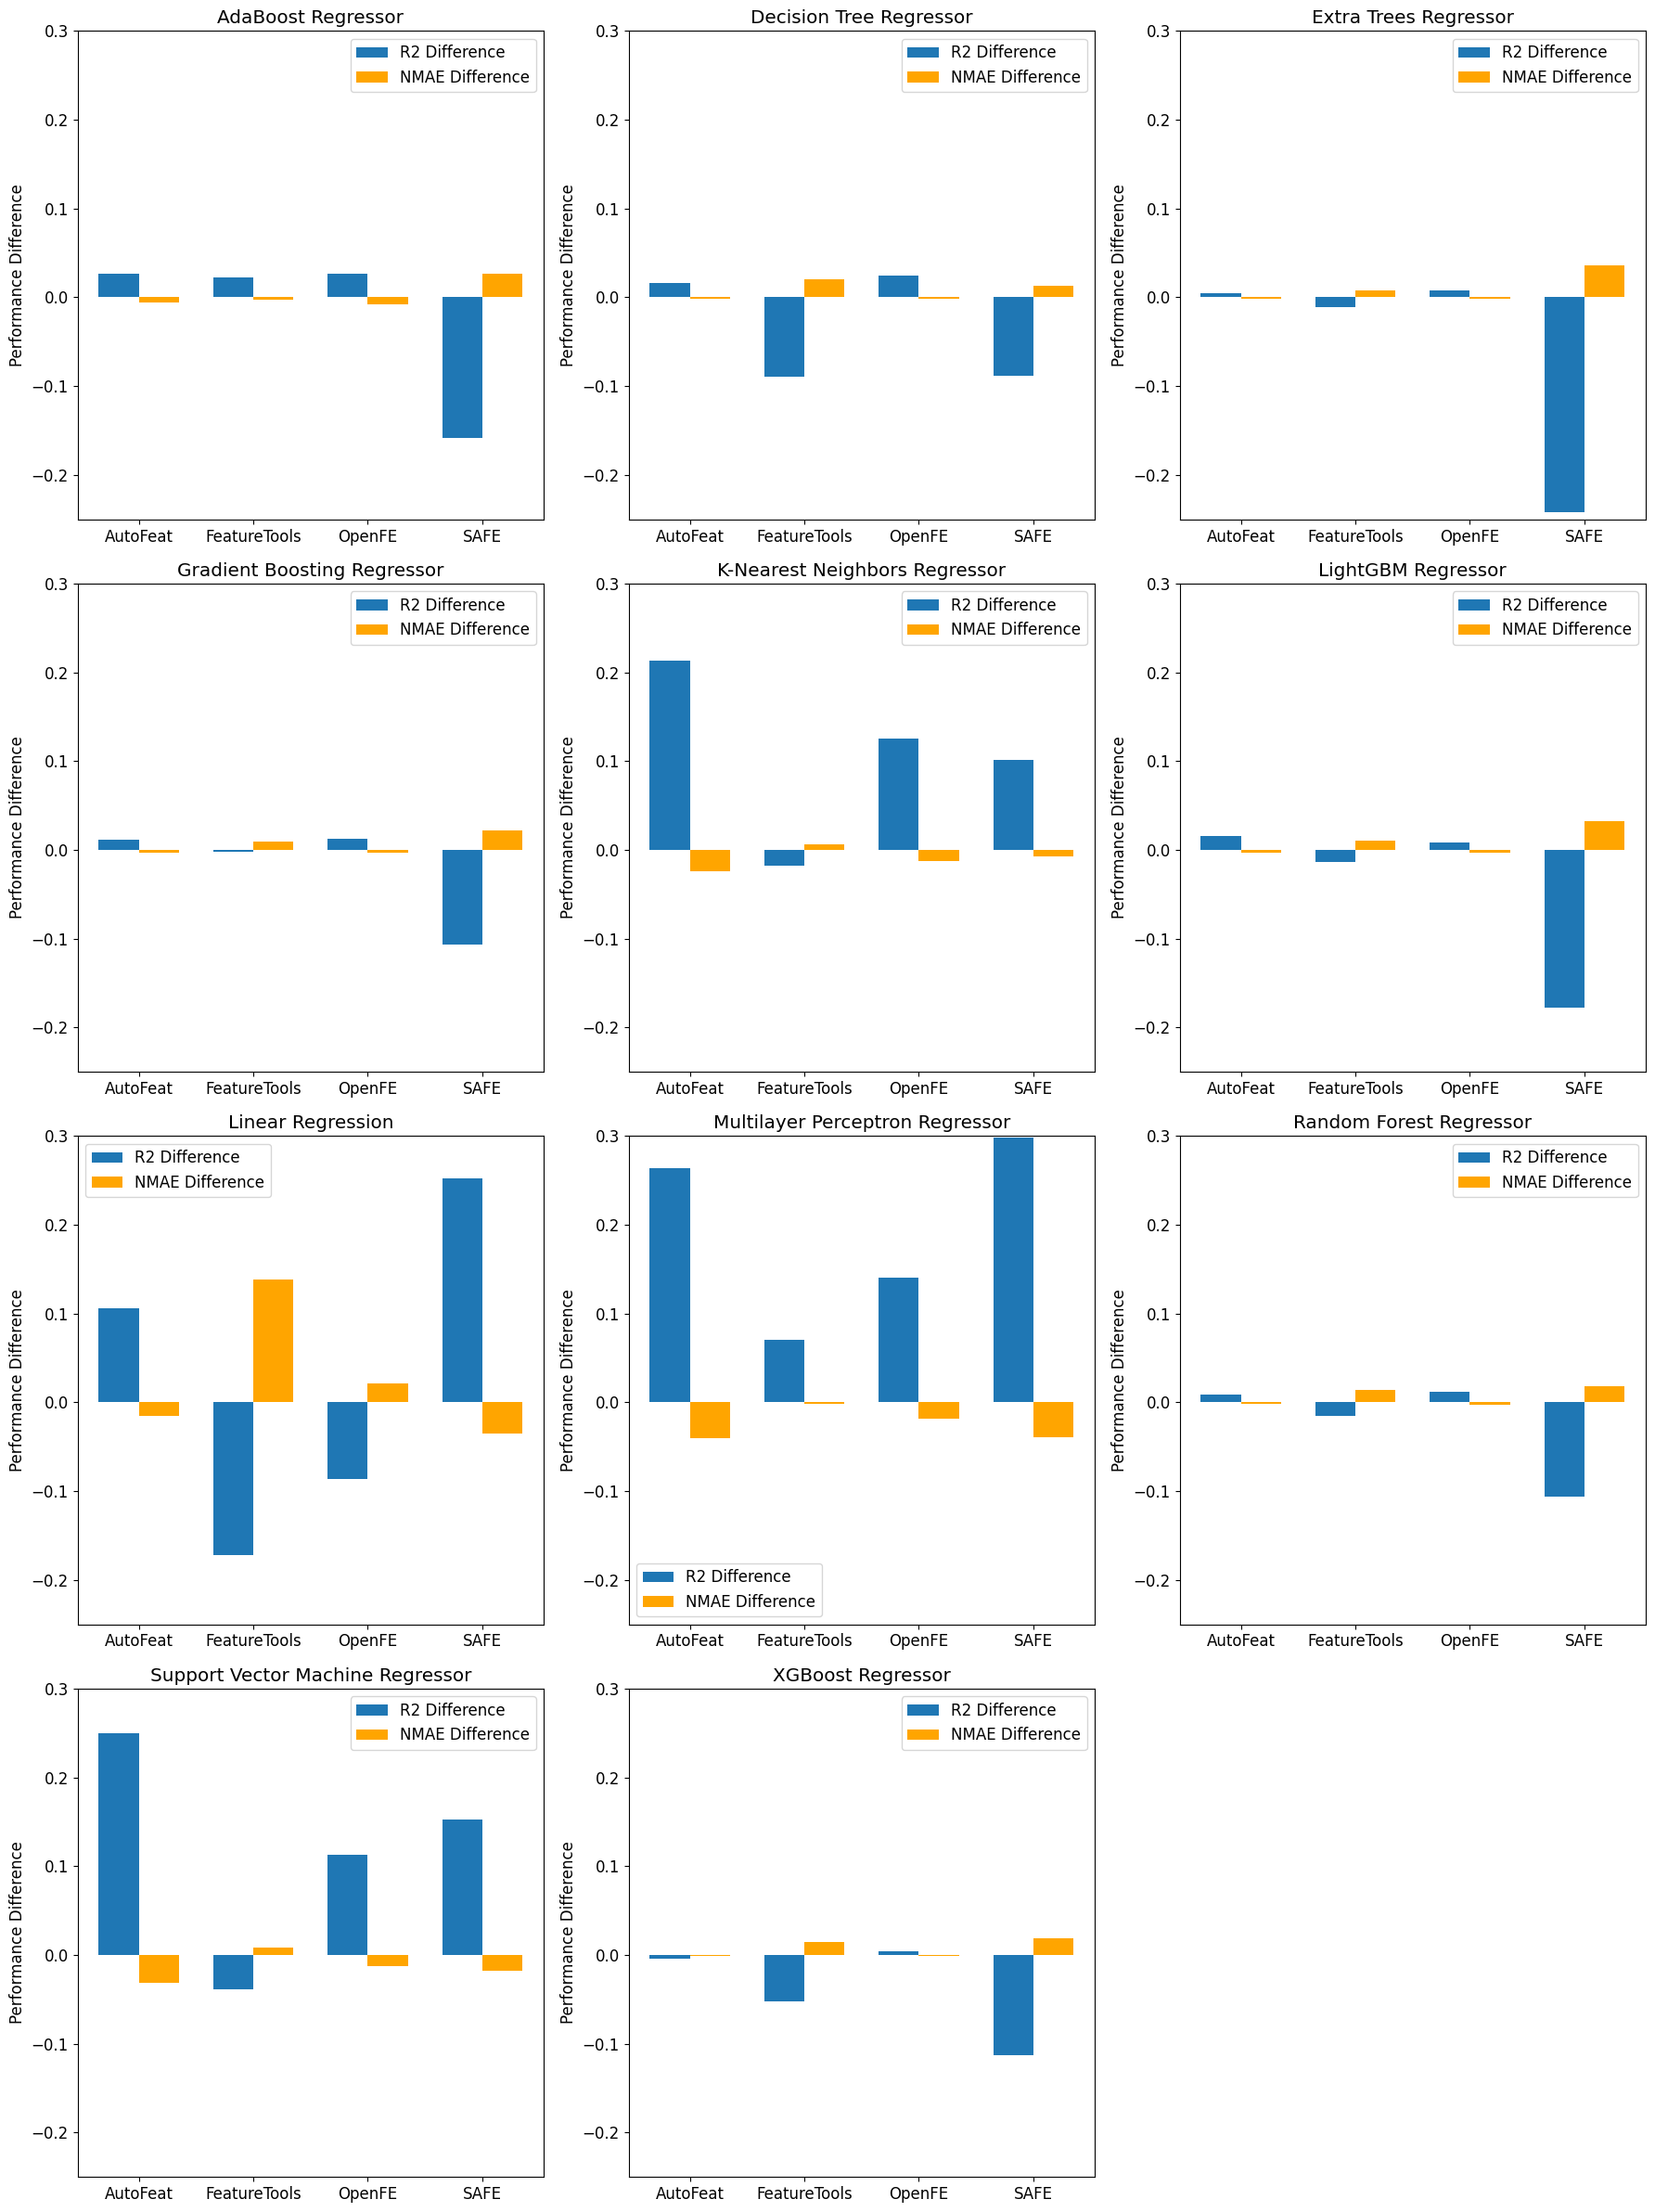

In [35]:
merged_df_regression = merged_df__regression_copy.copy()

# Define a dictionary to rename models to more descriptive names for regression scenarios
model_names_regression = {
    'AB': 'AdaBoost Regressor',
    'DT': 'Decision Tree Regressor',
    'ET': 'Extra Trees Regressor',
    'GB': 'Gradient Boosting Regressor',
    'KNN': 'K-Nearest Neighbors Regressor',
    'LGBM': 'LightGBM Regressor',
    'LR': 'Linear Regression',
    'MLP': 'Multilayer Perceptron Regressor',
    'RF': 'Random Forest Regressor',
    'SVM': 'Support Vector Machine Regressor',
    'XGB': 'XGBoost Regressor'
}

merged_df_regression['Model'] = merged_df_regression['Model'].map(model_names_regression)  # Map abbreviations to full names

# Setup figure for subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 24))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the axes array for easier iteration
# Set all font sizes to 12
plt.rcParams.update({'font.size': 12})

# Iterate over each model to plot their respective data
for index, model in enumerate(model_names_regression.values()):
    if index >= len(axes):
        break  # Avoid accessing axes that are not available

    # Filter the dataframe for the current model and drop any rows with NaN values
    df_model = merged_df_regression[merged_df_regression['Model'] == model].dropna()
    
    # Calculate the differences and then the average of differences for R2 and NMAE
    r2_diffs = {
        'AutoFeat': (df_model['R2_AutoFeat'] - df_model['R2']).mean(),
        'FeatureTools': (df_model['R2_FeatureTools'] - df_model['R2']).mean(),
        'OpenFE': (df_model['R2_OpenFE'] - df_model['R2']).mean(),
        'SAFE': (df_model['R2_SAFE'] - df_model['R2']).mean()
    }
    nmae_diffs = {
        'AutoFeat': (df_model['NMAE_AutoFeat'] - df_model['NMAE']).mean(),
        'FeatureTools': (df_model['NMAE_FeatureTools'] - df_model['NMAE']).mean(),
        'OpenFE': (df_model['NMAE_OpenFE'] - df_model['NMAE']).mean(),
        'SAFE': (df_model['NMAE_SAFE'] - df_model['NMAE']).mean()
    }

    # Plotting
    labels = list(r2_diffs.keys())
    x = np.arange(len(labels))  # Label locations
    width = 0.35  # Width of the bars
    axes[index].bar(x - width/2, r2_diffs.values(), width, label='R2 Difference')
    axes[index].bar(x + width/2, nmae_diffs.values(), width, label='NMAE Difference', color='orange')
    
    axes[index].set_ylabel('Performance Difference')
    axes[index].set_title(model)  # Use the full name for the model
    axes[index].set_xticks(x)
    axes[index].set_xticklabels(labels)
    axes[index].legend()
    axes[index].set_ylim(-0.25, 0.3)

# Hide unused subplots if there are fewer models than subplots
for i in range(len(model_names_regression), len(axes)):
    axes[i].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('../Diagrams/fig7_B.pdf', format='pdf', bbox_inches='tight')
plt.show()


# Analyzing the change in performance - CD Plots

Checking for differences using friedman test

In [36]:

def perform_friedman_test(dataframe, model_col, metric):
    """
    Performs the Friedman test on scores extracted from the specified metric column, grouped by models,
    and provides an interpretation of the results.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame containing the data.
    - model_col (str): The name of the column in the DataFrame that identifies the model.
    - metric (str): The name of the metric column for which the Friedman test is to be performed.

    Returns:
    - dict: A dictionary containing the Friedman test statistic, p-value, and interpretation of the results.
    """
    # Extract scores for each model from the dataframe
    score_data = [group[metric].values for _, group in dataframe.groupby(model_col)]

    # Perform the Friedman test on the extracted scores
    friedman_result = ss.friedmanchisquare(*score_data)

    # Interpret the results
    alpha = 0.05  # typical value for statistical significance
    if friedman_result.pvalue < alpha:
        interpretation = 'There is  evidence that the performance of the models is significantly different.'
    else:
        interpretation = 'There is no evidence that the performance of the models is significantly different.'

    # Create result dictionary
    result = {
        'Statistic': friedman_result.statistic,
        'P-value': friedman_result.pvalue,
        'Interpretation': interpretation
    }

    return result


Getting the dataframes

In [37]:
merged_df = merged_df_copy.copy()
merged_df_regression = merged_df__regression_copy.copy()

Creating dataframes of suitable for friedman test

In [38]:
#Define model names
model_names = ['AB', 'DT', 'ET', 'GB', 'KNN', 'LGBM', 'LR', 'MLP', 'RF', 'SVM', 'XGB']

# Create a dictionary to store dataframes with dynamic names
result_dfs = {}

#Create seperate dataframes for each model
for model_names in model_names:
    # Step 2: Get the rows pertaining to each model
    average_df = merged_df[merged_df['Model'] == model_names].drop('Model', axis=1)

    #Drop the missing values
    average_df = average_df.dropna()

    features = ['BigFeat', 'AutoFeat', 'FeatureTools', 'OpenFE', 'SAFE']
    metrics = ['Accuracy', 'F1']
    
    # Step 4: Create a new dataframe with 'Dataframe', 'Framework', 'Accuracy', 'F1'
    # Initialize an empty DataFrame to store results
    result_df = pd.DataFrame()

    # Add the base metrics
    base_metrics_df = average_df[['Dataframe', 'Accuracy', 'F1']].copy()
    base_metrics_df['Framework'] = 'Base'
    result_df = pd.concat([result_df, base_metrics_df], ignore_index=True)

    # Add the feature-specific metrics
    for feature in features:
        temp_df = average_df[['Dataframe']].copy()
        for metric in metrics:
            temp_df[metric] = average_df[f'{metric}_{feature}']
        temp_df['Framework'] = feature
        result_df = pd.concat([result_df, temp_df], ignore_index=True)

    # Store the dataframe with the correct name in the dictionary
    result_dfs[f'result_df_{model_names}'] = result_df



In [39]:
#Define model names
model_names = ['AB', 'DT', 'ET', 'GB', 'KNN', 'LGBM', 'LR', 'MLP', 'RF', 'SVM', 'XGB']

# Create a dictionary to store dataframes with dynamic names
result_dfs_regression = {}

for model_names in model_names:
    # Step 2: Get the rows pertaining to each model
    average_df_regression = merged_df_regression[merged_df_regression['Model'] == model_names].drop('Model', axis=1)
    #Drop the missing values
    average_df_regression = average_df_regression.dropna()

    features = ['AutoFeat', 'FeatureTools', 'OpenFE', 'SAFE']
    metrics = ['NMAE', 'R2']

    # Step 4: Create a new dataframe with 'Dataframe', 'Framework', 'NMAE', 'R2'
    # Initialize an empty DataFrame to store results
    result_df_regression = pd.DataFrame()

    # Add the base metrics
    base_metrics_df_regression = average_df_regression[['Dataframe', 'NMAE', 'R2']].copy()
    base_metrics_df_regression['Framework'] = 'Base'
    result_df_regression = pd.concat([result_df_regression, base_metrics_df_regression], ignore_index=True)

    # Add the feature-specific metrics
    for feature in features:
        temp_df = average_df_regression[['Dataframe']].copy()
        for metric in metrics:
            temp_df[metric] = average_df_regression[f'{metric}_{feature}']
        temp_df['Framework'] = feature
        result_df_regression = pd.concat([result_df_regression, temp_df], ignore_index=True)
    
    # Store the dataframe with the correct name in the dictionary
    result_dfs_regression[f'result_df_{model_names}'] = result_df_regression

Finding the values of the Friedman Test

In [40]:
for model_names,dataframe in result_dfs.items():
    print(model_names)
    for metric in ['Accuracy','F1']:
        print(f'The metric is: {metric}')
        result = perform_friedman_test(dataframe, 'Framework', metric)
        print(result)

result_df_AB
The metric is: Accuracy
{'Statistic': np.float64(11.815068493150665), 'P-value': np.float64(0.03741154164669175), 'Interpretation': 'There is  evidence that the performance of the models is significantly different.'}
The metric is: F1
{'Statistic': np.float64(10.76271186440676), 'P-value': np.float64(0.05629306136372993), 'Interpretation': 'There is no evidence that the performance of the models is significantly different.'}
result_df_DT
The metric is: Accuracy
{'Statistic': np.float64(14.808917197452226), 'P-value': np.float64(0.011210782665974597), 'Interpretation': 'There is  evidence that the performance of the models is significantly different.'}
The metric is: F1
{'Statistic': np.float64(22.611464968152855), 'P-value': np.float64(0.00040045730464591185), 'Interpretation': 'There is  evidence that the performance of the models is significantly different.'}
result_df_ET
The metric is: Accuracy
{'Statistic': np.float64(17.16129032258064), 'P-value': np.float64(0.0042038

In [41]:
for model_names,dataframe in result_dfs_regression.items():
    print(model_names)
    for metric in ['NMAE','R2']:
        print(f'The metric is: {metric}')
        result = perform_friedman_test(dataframe, 'Framework', metric)
        print(result)

result_df_AB
The metric is: NMAE
{'Statistic': np.float64(34.823529411764696), 'P-value': np.float64(5.049659380264656e-07), 'Interpretation': 'There is  evidence that the performance of the models is significantly different.'}
The metric is: R2
{'Statistic': np.float64(34.29333333333332), 'P-value': np.float64(6.487750583974176e-07), 'Interpretation': 'There is  evidence that the performance of the models is significantly different.'}
result_df_DT
The metric is: NMAE
{'Statistic': np.float64(32.56470588235294), 'P-value': np.float64(1.466448566400257e-06), 'Interpretation': 'There is  evidence that the performance of the models is significantly different.'}
The metric is: R2
{'Statistic': np.float64(23.62459546925563), 'P-value': np.float64(9.497543636090016e-05), 'Interpretation': 'There is  evidence that the performance of the models is significantly different.'}
result_df_ET
The metric is: NMAE
{'Statistic': np.float64(38.07058823529411), 'P-value': np.float64(1.0836088056455152e-0

Rename the data

In [42]:
# Original dictionary keys
result_dfs_regression_keys = ['result_df_AB', 'result_df_DT', 'result_df_ET', 'result_df_GB', 'result_df_KNN', 'result_df_LGBM', 'result_df_LR', 'result_df_MLP', 'result_df_RF', 'result_df_SVM', 'result_df_XGB']

# Create a new dictionary with renamed keys
renamed_dfs_regression = {key.replace('result_df_', ''): result_dfs_regression[key] for key in result_dfs_regression_keys}
renamed_dfs_classification = {key.replace('result_df_', ''): result_dfs[key] for key in result_dfs_regression_keys}

Plotting critical difference diagrams

In [48]:
def plot_critical_difference_subplots(df_dict, model_col, run_col, metric,name):
    """
    Generates a 4x3 grid of critical difference diagrams for the specified metric across different models and runs for multiple dataframes.

    Parameters:
    - df_dict (dict): A dictionary with DataFrame names as keys and DataFrames as values.
    - model_col (str): The name of the column in the DataFrame that identifies the model.
    - run_col (str): The name of the column in the DataFrame that identifies the run or dataset evaluation.
    - metric (str): The name of the metric column for which the critical difference is to be computed.
    - name(str): The name in which the diagram should be stored
    """
    # Set up the subplot grid
    fig, axes = plt.subplots(6, 2, figsize=(25, 30))  # Adjust the size as needed
    plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust spacing as needed
    axes = axes.flatten()  # Flatten to easily iterate over it


    # Loop over each DataFrame in the dictionary
    for i, (df_name, df) in enumerate(df_dict.items()):
        # Set all font sizes to 12
        plt.rcParams.update({'font.size': 12})
        if i >= 12:  # We have only 12 plots available (4x3 grid)
            break

        # Calculate average ranks of the metric across runs for each model
        avg_rank = df.groupby(run_col)[metric].rank(pct=False, ascending=False).groupby(df[model_col]).mean()

        # Perform the Nemenyi Friedman test
        test_results = sp.posthoc_nemenyi_friedman(
            df.sort_values(by=[run_col, model_col]),
            melted=True,
            block_col=run_col,
            group_col=model_col,
            y_col=metric,
        )

        # Set current axis
        ax = axes[i]
        plt.sca(ax)

        # Create the plot
        sp.critical_difference_diagram(
            ranks=avg_rank,
            sig_matrix=test_results,
            label_fmt_left='{label} [{rank:.3f}]  ',
            label_fmt_right='  [{rank:.3f}] {label}',
            text_h_margin=0.3,
            label_props={'color': 'black', 'fontweight': 'bold'},
            crossbar_props={'color': None, 'marker': 'o'},
            marker_props={'marker': '*', 's': 150, 'color': 'y', 'edgecolor': 'k'},
            elbow_props={'color': 'gray'},
            ax=ax  # Specify the subplot axis
        )

        # Set the title for each subplot
        ax.set_title(df_name)

    # Hide unused subplots if any
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.savefig(f'../Diagrams/{name}.pdf', format='pdf', bbox_inches='tight')
    plt.show()


Plotting for the R Squared Values

c:\Users\25644574\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
c:\Users\25644574\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
c:\Users\25644574\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
c:\Users\25644574\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'S

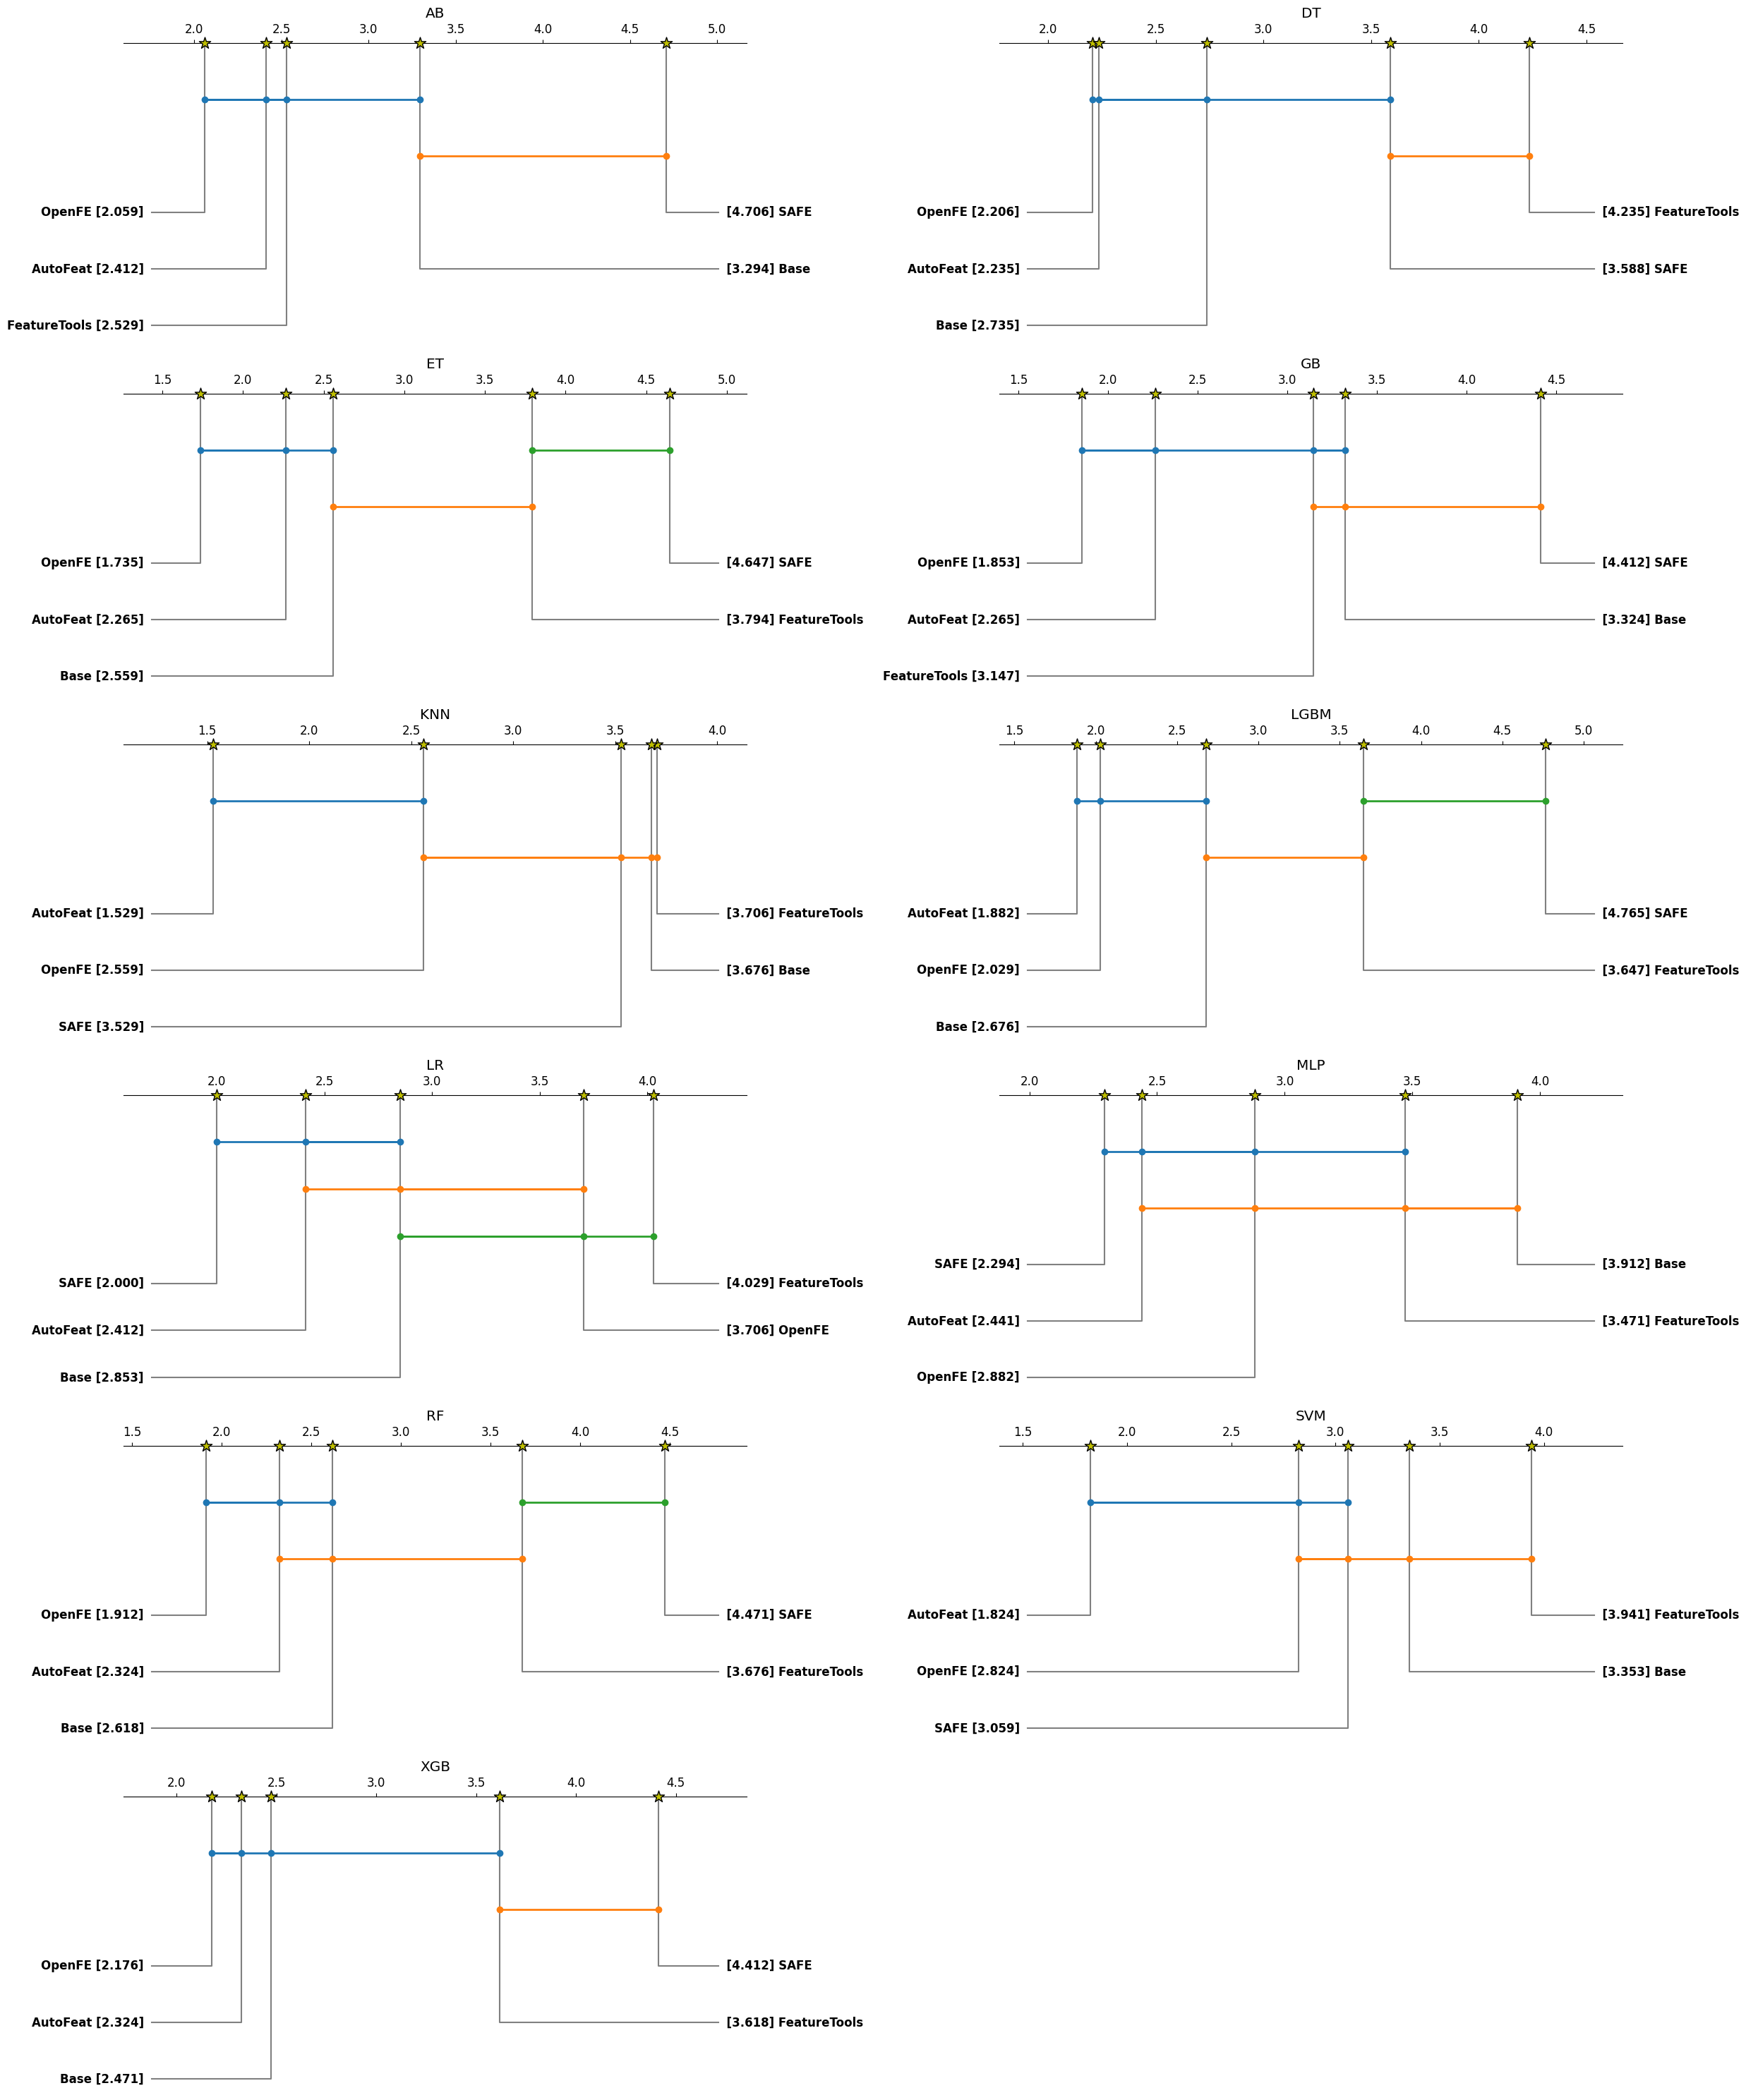

In [49]:
plot_critical_difference_subplots(renamed_dfs_regression, 'Framework', 'Dataframe', 'R2','fig11')

Plotting for the accuracy values

In [50]:
def plot_critical_difference_subplots(df_dict, model_col, run_col, metric,name):
    """
    Generates a 4x3 grid of critical difference diagrams for the specified metric across different models and runs for multiple dataframes.

    Parameters:
    - df_dict (dict): A dictionary with DataFrame names as keys and DataFrames as values.
    - model_col (str): The name of the column in the DataFrame that identifies the model.
    - run_col (str): The name of the column in the DataFrame that identifies the run or dataset evaluation.
    - metric (str): The name of the metric column for which the critical difference is to be computed.
    """
    # Set up the subplot grid
    fig, axes = plt.subplots(4, 2, figsize=(25, 30))  # Adjust the size as needed
    plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust spacing as needed
    axes = axes.flatten()  # Flatten to easily iterate over it

    # Loop over each DataFrame in the dictionary
    for i, (df_name, df) in enumerate(df_dict.items()):
        if i >= 12:  # We have only 12 plots available (4x3 grid)
            break

        # Calculate average ranks of the metric across runs for each model
        avg_rank = df.groupby(run_col)[metric].rank(pct=False, ascending=False).groupby(df[model_col]).mean()

        # Perform the Nemenyi Friedman test
        test_results = sp.posthoc_nemenyi_friedman(
            df.sort_values(by=[run_col, model_col]),
            melted=True,
            block_col=run_col,
            group_col=model_col,
            y_col=metric,
        )

        # Set current axis
        ax = axes[i]
        plt.sca(ax)

        # Create the plot
        sp.critical_difference_diagram(
            ranks=avg_rank,
            sig_matrix=test_results,
            label_fmt_left='{label} [{rank:.3f}]  ',
            label_fmt_right='  [{rank:.3f}] {label}',
            text_h_margin=0.3,
            label_props={'color': 'black', 'fontweight': 'bold'},
            crossbar_props={'color': None, 'marker': 'o'},
            marker_props={'marker': '*', 's': 150, 'color': 'y', 'edgecolor': 'k'},
            elbow_props={'color': 'gray'},
            ax=ax  # Specify the subplot axis
        )

        # Set the title for each subplot
        ax.set_title(df_name)

    # Hide unused subplots if any
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.savefig(f'../Diagrams/{name}.pdf', format='pdf', bbox_inches='tight')

    plt.show()


c:\Users\25644574\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
c:\Users\25644574\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
c:\Users\25644574\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
c:\Users\25644574\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'S

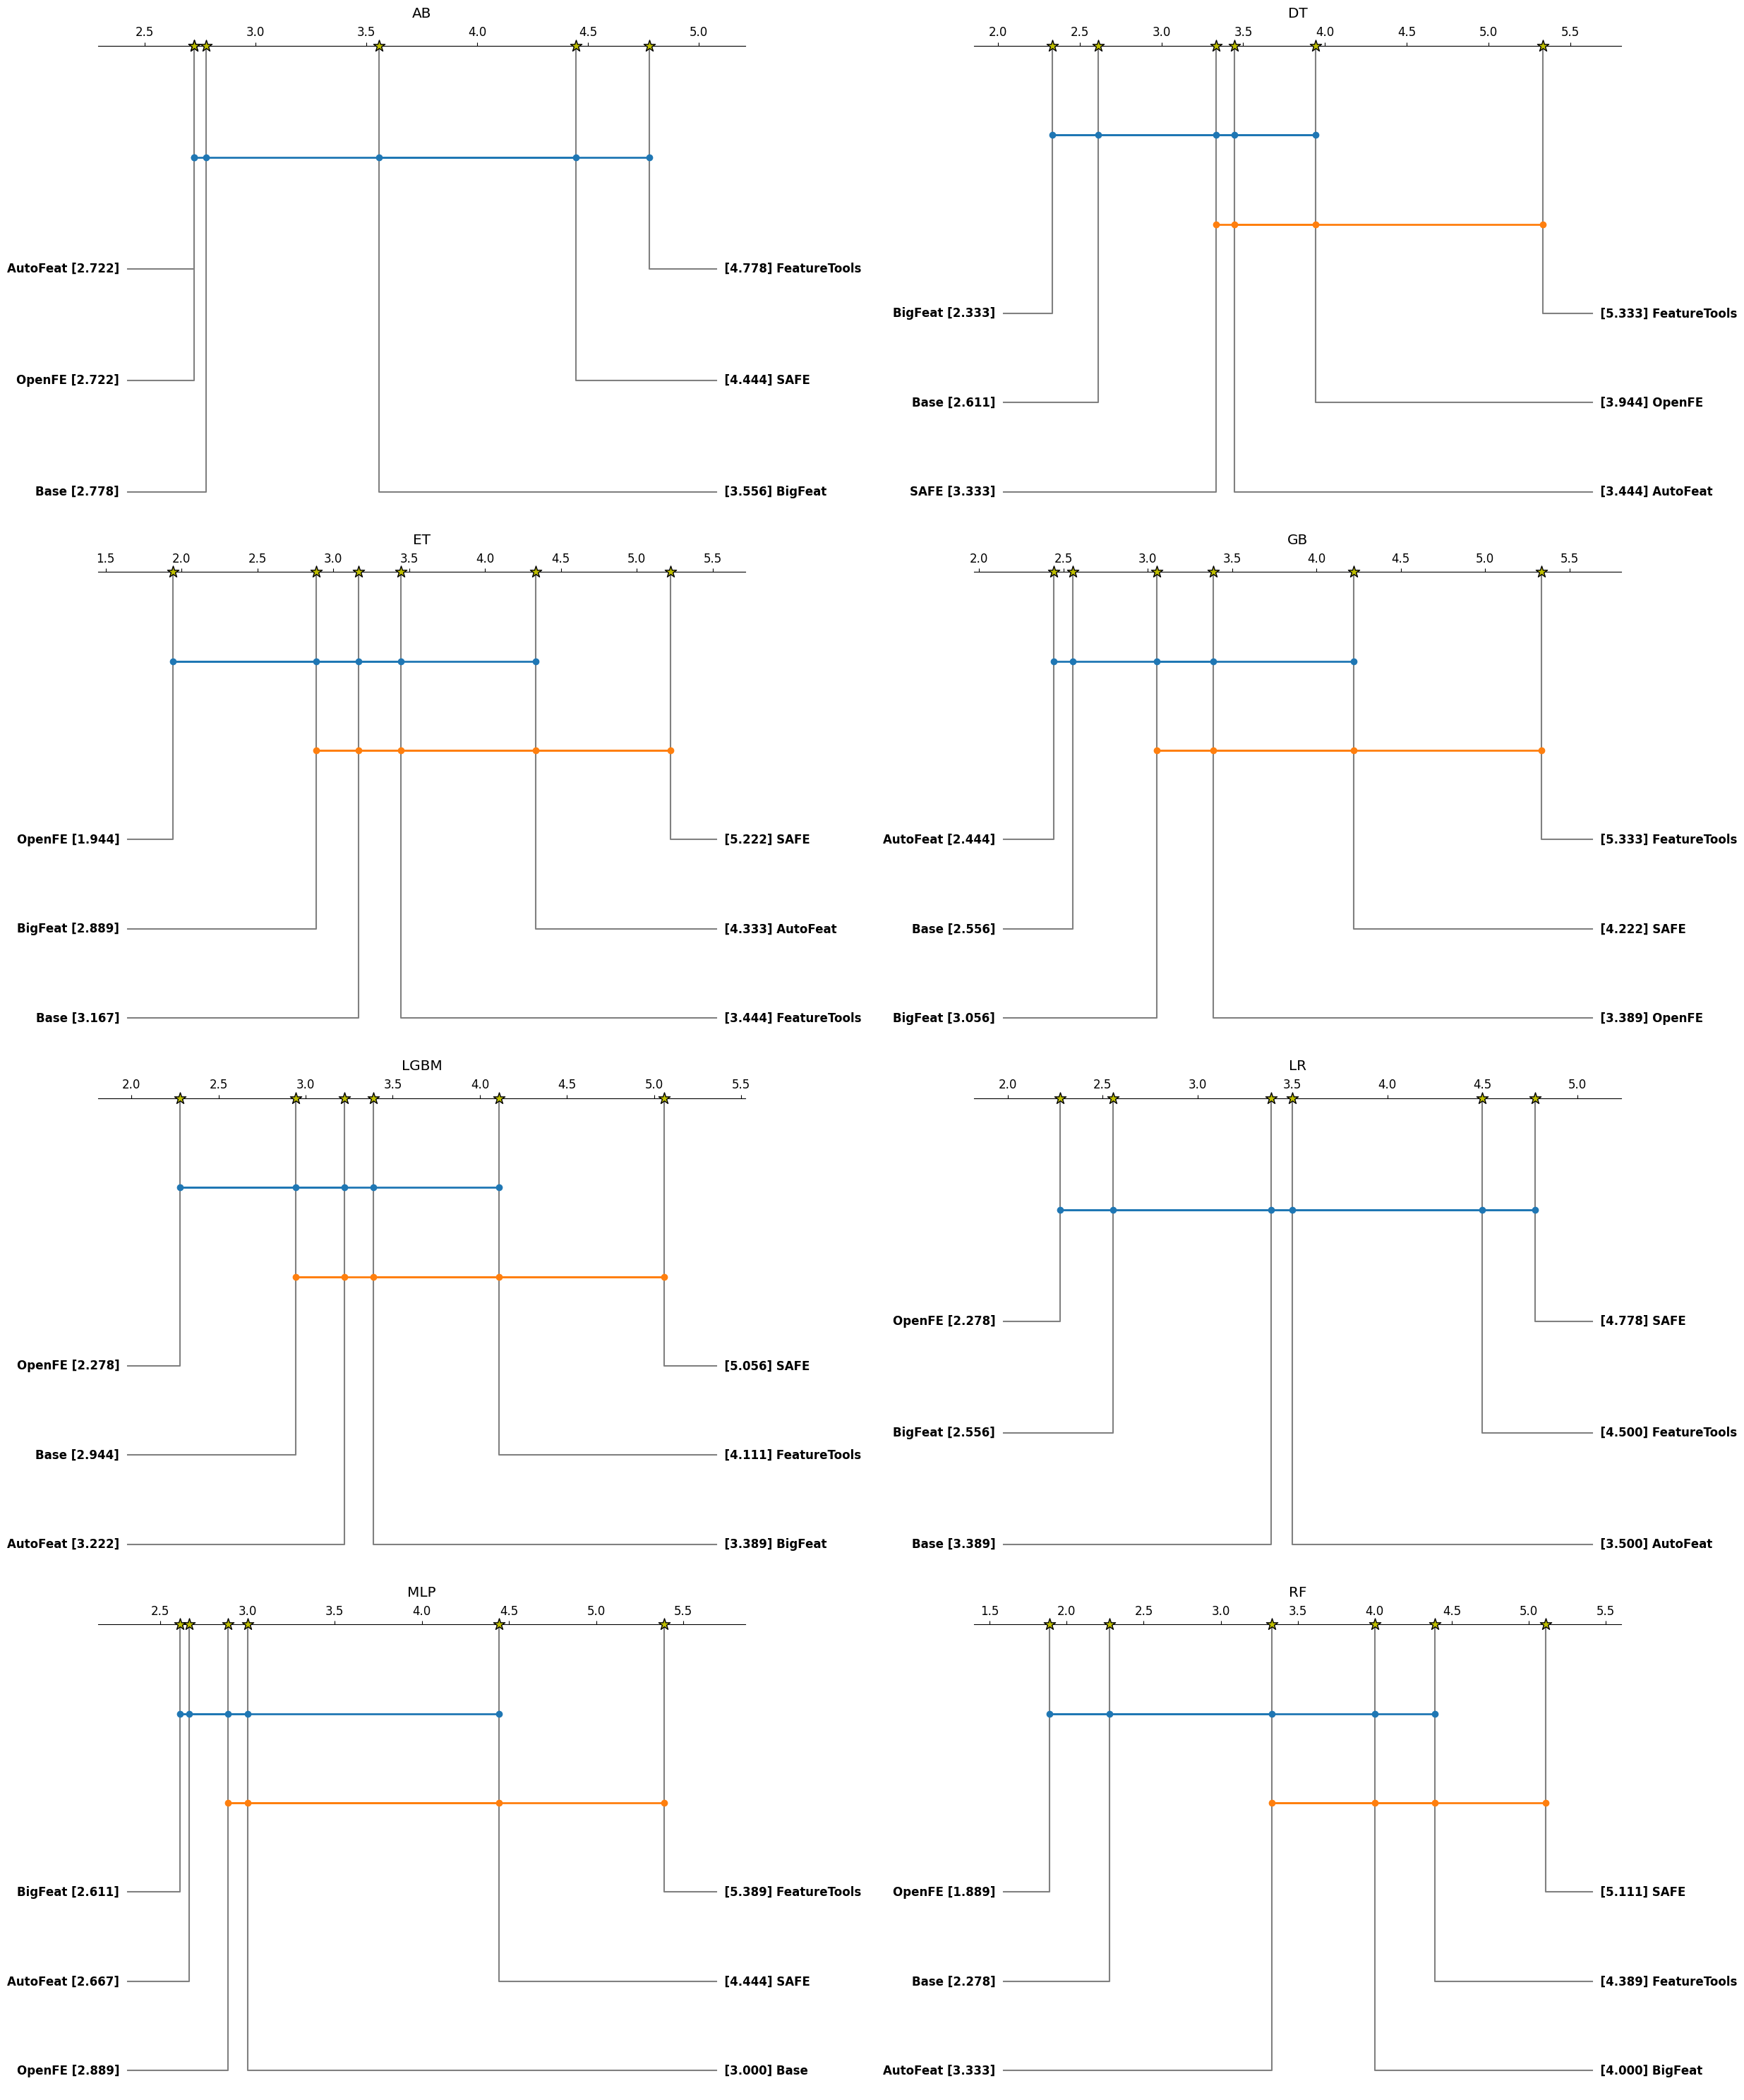

In [51]:
plot_critical_difference_subplots({key: val for key, val in renamed_dfs_classification.items() if key not in ['KNN', 'SVM', 'XGB']}, 'Framework', 'Dataframe', 'Accuracy','fig9')

Plotting for the F1 Values

c:\Users\25644574\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
c:\Users\25644574\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
c:\Users\25644574\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
c:\Users\25644574\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'S

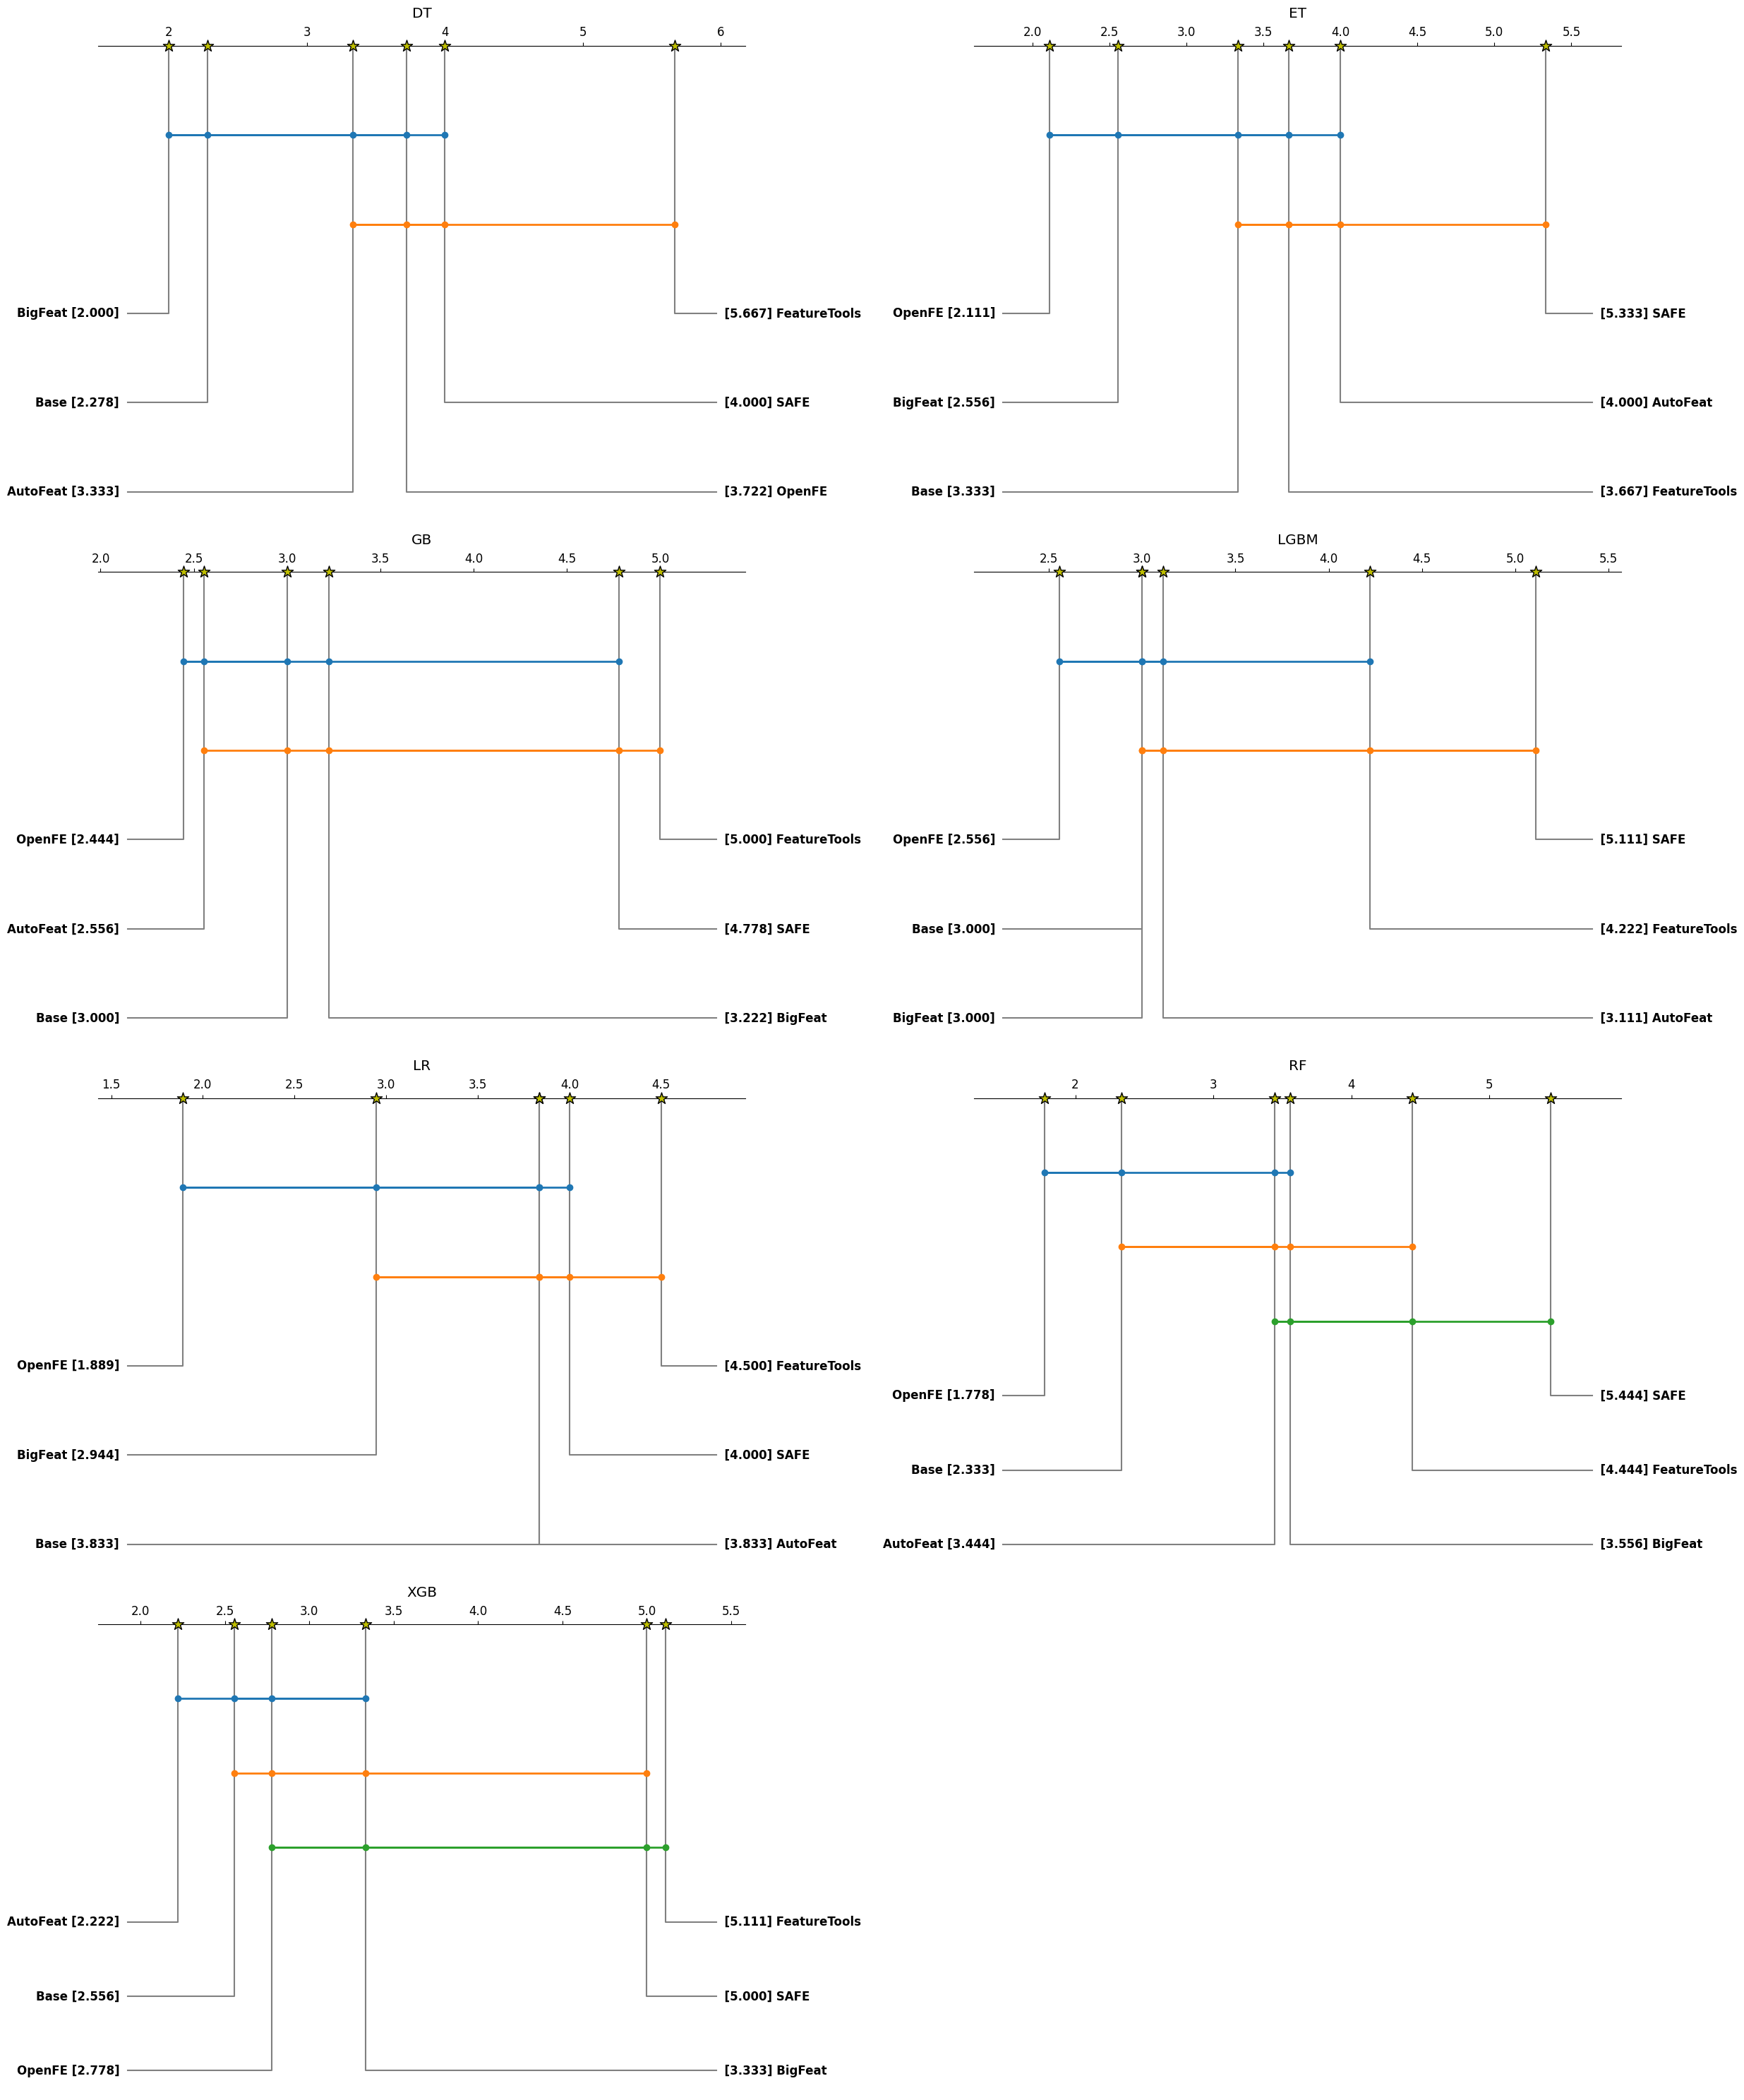

In [52]:
plot_critical_difference_subplots({key: val for key, val in renamed_dfs_classification.items() if key not in ['AB','KNN', 'SVM', 'MLP']}, 'Framework', 'Dataframe', 'F1','fig10')

Taking the negative of things for NMAE

In [53]:
def plot_critical_difference_subplots(df_dict, model_col, run_col, metric,name):
    """
    Generates a 4x3 grid of critical difference diagrams for the specified metric across different models and runs for multiple dataframes.

    Parameters:
    - df_dict (dict): A dictionary with DataFrame names as keys and DataFrames as values.
    - model_col (str): The name of the column in the DataFrame that identifies the model.
    - run_col (str): The name of the column in the DataFrame that identifies the run or dataset evaluation.
    - metric (str): The name of the metric column for which the critical difference is to be computed.
    """
    # Set up the subplot grid
    fig, axes = plt.subplots(6, 2, figsize=(25, 30))  # Adjust the size as needed
    plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust spacing as needed
    axes = axes.flatten()  # Flatten to easily iterate over it

    # Loop over each DataFrame in the dictionary
    for i, (df_name, df) in enumerate(df_dict.items()):
        if i >= 12:  # We have only 12 plots available (4x3 grid)
            break

        # Calculate average ranks of the metric across runs for each model
        avg_rank = df.groupby(run_col)[metric].rank(pct=False).groupby(df[model_col]).mean()

        # Perform the Nemenyi Friedman test
        test_results = sp.posthoc_nemenyi_friedman(
            df.sort_values(by=[run_col, model_col]),
            melted=True,
            block_col=run_col,
            group_col=model_col,
            y_col=metric,
        )

        # Set current axis
        ax = axes[i]
        plt.sca(ax)

        # Create the plot
        sp.critical_difference_diagram(
            ranks=avg_rank,
            sig_matrix=test_results,
            label_fmt_left='{label} [{rank:.3f}]  ',
            label_fmt_right='  [{rank:.3f}] {label}',
            text_h_margin=0.3,
            label_props={'color': 'black', 'fontweight': 'bold'},
            crossbar_props={'color': None, 'marker': 'o'},
            marker_props={'marker': '*', 's': 150, 'color': 'y', 'edgecolor': 'k'},
            elbow_props={'color': 'gray'},
            ax=ax  # Specify the subplot axis
        )

        # Set the title for each subplot
        ax.set_title(df_name)

    # Hide unused subplots if any
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.savefig(f'../Diagrams/{name}.pdf', format='pdf', bbox_inches='tight')

    plt.show()


c:\Users\25644574\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
c:\Users\25644574\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
c:\Users\25644574\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
c:\Users\25644574\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'S

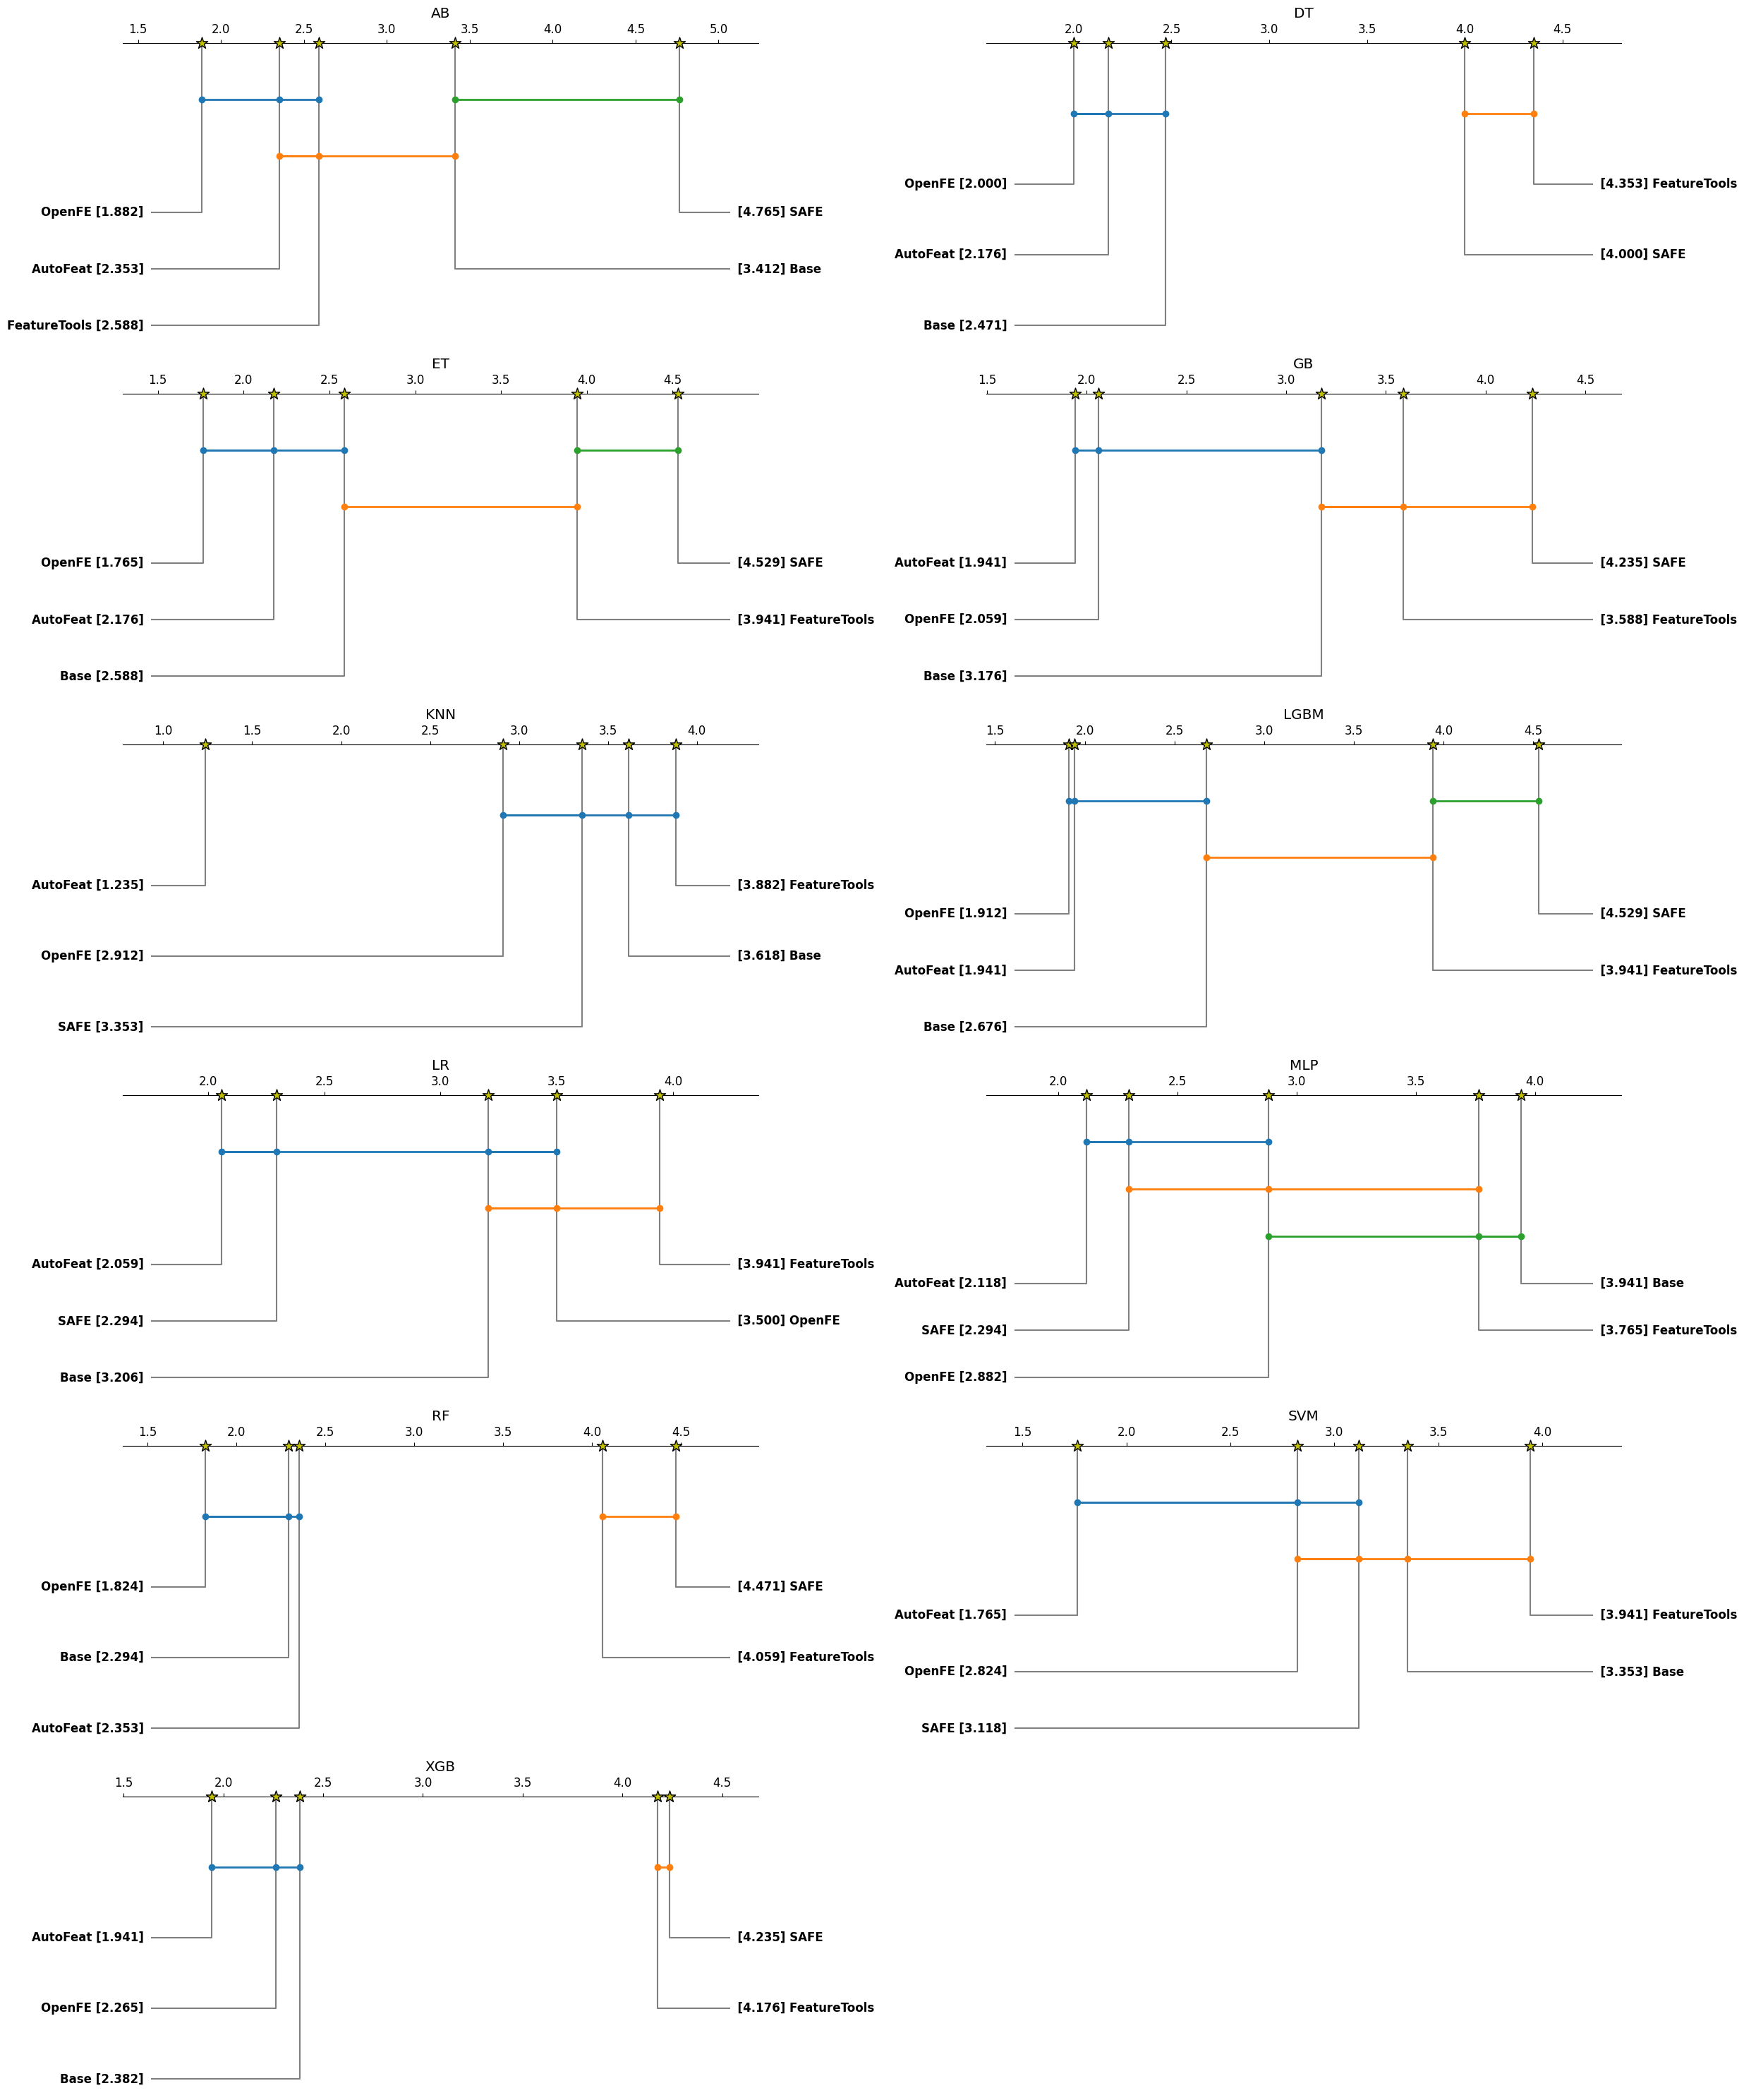

In [54]:
plot_critical_difference_subplots(renamed_dfs_regression, 'Framework', 'Dataframe', 'NMAE','fig12')

# Execution Time

Getting the data ready

In [62]:
# Paths to the pickle files
Base_path = '../Results/Base_Results.pkl'
BigFeat_path = '../Results/BigFeat_results.pkl'
AutoFeat_path = '../Results/AutoFeat_results.pkl'
FT_path = '../Results/FT_Results.pkl'
Open_path = '../Results/OpenFE_Results.pkl'
SAFE_path = '../Results/SAFE_Results.pkl'

# Load the data
with open(Base_path, 'rb') as f:
    Base = pickle.load(f)

with open(BigFeat_path, 'rb') as f:
    BigFeat = pickle.load(f)

with open(AutoFeat_path, 'rb') as f:
    AutoFeat = pickle.load(f)

with open(FT_path, 'rb') as f:
    FeatureTools = pickle.load(f)

with open(Open_path, 'rb') as f:
    OpenFE = pickle.load(f)

with open(SAFE_path, 'rb') as f:
    SAFE = pickle.load(f)

#Merging all the dataframes together
AutoFeat['time_df'] = AutoFeat['time_df'].groupby('DataFrame').mean().reset_index()
BigFeat['time_df'] = BigFeat['time_df'].groupby('DataFrame').mean().reset_index()
SAFE['time_df'] = SAFE['time_df'].groupby('DataFrame').mean().reset_index()
OpenFE['time_df'] = OpenFE['time_df'].groupby('DataFrame').mean().reset_index()
FeatureTools['time_df'] = FeatureTools['time_df'].groupby('DataFrame').mean().reset_index()

# Rename 'Average Time' columns to include the framework name
AutoFeat['time_df'].rename(columns={'Time': 'Average Time_AutoFeat'}, inplace=True)
BigFeat['time_df'].rename(columns={'Time': 'Average Time_BigFeat'}, inplace=True)
SAFE['time_df'].rename(columns={'Time': 'Average Time_SAFE'}, inplace=True)
OpenFE['time_df'].rename(columns={'Time': 'Average Time_OpenFE'}, inplace=True)
FeatureTools['time_df'].rename(columns={'Time': 'Average Time_FeatureTools'}, inplace=True)

# Start merging with the first dataframe
merged_time_df = AutoFeat['time_df']
# List of other dataframes to merge
other_time_dfs = [BigFeat['time_df'], SAFE['time_df'], OpenFE['time_df'], FeatureTools['time_df']]

# Sequentially merge dataframes using an inner join on 'Dataset'
for df in other_time_dfs:
    merged_time_df = pd.merge(merged_time_df, df, on='DataFrame', how='outer')

# Remove the last 14 characters from each value in the 'DataFrame' column
merged_time_df['DataFrame'] = merged_time_df['DataFrame'].str[:-14]

Seperating regression and classification data

In [63]:
regression_datasets = [ 'fri_c3_1000_50', 'fri_c2_1000_25', 'fri_c4_500_50', 'fri_c4_1000_50', 'fri_c1_1000_25', 'fri_c1_500_50', 'fri_c3_1000_25', 'auto93', 'pyrim', 'autoPrice', 'boston', 'Concrete_Compressive_Strength', 'Auto_MPG', 'Forest Fires', 'Servo', 'Airfoil_Self_Noise', 'Wine_Quality', 'BodyFat', 'California_Housing', 'Quake']
regression_df = merged_time_df[merged_time_df['DataFrame'].isin(regression_datasets)]
classification_df = merged_time_df[~merged_time_df['DataFrame'].isin(regression_datasets)]

Plot of average time

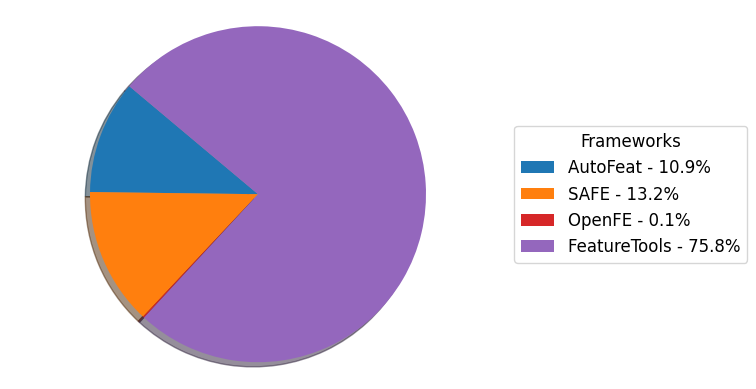

In [64]:
#Delete the BigFeat column
del(regression_df['Average Time_BigFeat'])

#Drop the NaN Values
regression_df = regression_df.dropna()

# Set all font sizes to 12
plt.rcParams.update({'font.size': 12})

# Calculate the total time for each framework
total_times = {
    'AutoFeat': regression_df['Average Time_AutoFeat'].mean(),
    'SAFE': regression_df['Average Time_SAFE'].mean(),
    'OpenFE': regression_df['Average Time_OpenFE'].mean(),
    'FeatureTools': regression_df['Average Time_FeatureTools'].mean()
}

# Labels for the pie chart
labels = total_times.keys()

# Values for the pie chart (total times)
sizes = total_times.values()

# Calculate percentages for the legend
percentages = [f"{(s / sum(sizes) * 100):.1f}%" for s in sizes]

# Combine labels and percentages for the legend
legend_labels = [f"{label} - {percent}" for label, percent in zip(labels, percentages)]

# Colors for each segment
colors = ['#1f77b4', '#ff7f0e', '#d62728', '#9467bd']  # Custom color list

# Plotting the pie chart
fig, ax = plt.subplots()
wedges, texts = ax.pie(sizes, colors=colors, shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding legend with color patches and percentages
plt.legend(wedges, legend_labels, title="Frameworks", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

#Save the figure
plt.savefig('../Diagrams/fig15_B.pdf', bbox_inches='tight')

# Show the plot
plt.show()

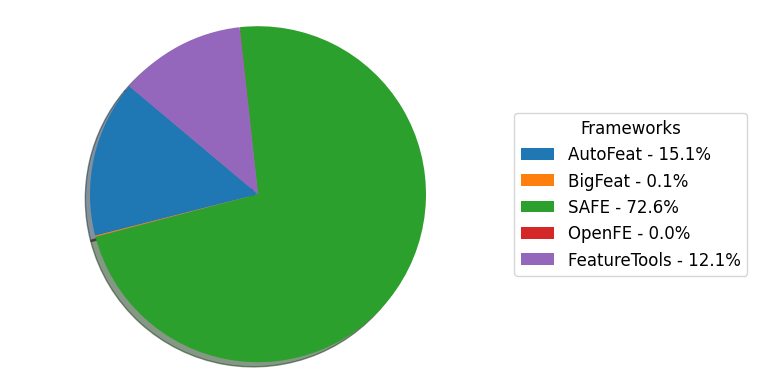

In [65]:
#Drop the rows with NaN
classification_df = classification_df.dropna()

# Set all font sizes to 12
plt.rcParams.update({'font.size': 12})

# Calculate the total time for each framework
total_times = {
    'AutoFeat': classification_df['Average Time_AutoFeat'].mean(),
    'BigFeat': classification_df['Average Time_BigFeat'].mean(),
    'SAFE': classification_df['Average Time_SAFE'].mean(),
    'OpenFE': classification_df['Average Time_OpenFE'].mean(),
    'FeatureTools': classification_df['Average Time_FeatureTools'].mean()
}

# Labels for the pie chart
labels = total_times.keys()

# Values for the pie chart (total times)
sizes = total_times.values()

# Calculate percentages for the legend
percentages = [f"{(s / sum(sizes) * 100):.1f}%" for s in sizes]

# Combine labels and percentages for the legend
legend_labels = [f"{label} - {percent}" for label, percent in zip(labels, percentages)]

# Colors for each segment
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Custom color list

# Plotting the pie chart
fig, ax = plt.subplots()
wedges, texts = ax.pie(sizes, colors=colors, shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding legend with color patches and percentages
plt.legend(wedges, legend_labels, title="Frameworks", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

#Save the figure
plt.savefig('../Diagrams/fig15_A.pdf', bbox_inches='tight')

# Show the plot
plt.show()

Get normalized time

In [66]:
# Calculate the average time for each framework
average_times = {
    'Average Time_AutoFeat': classification_df['Average Time_AutoFeat'].mean(),
    'Average Time_BigFeat': classification_df['Average Time_BigFeat'].mean(),
    'Average Time_SAFE': classification_df['Average Time_SAFE'].mean(),
    'Average Time_OpenFE': classification_df['Average Time_OpenFE'].mean(),
    'Average Time_FeatureTools': classification_df['Average Time_FeatureTools'].mean()
}

# Find the minimum average time among the frameworks
min_average_time = min(average_times.values())

# Normalize the average times by dividing by the minimum average time
normalized_times = {framework: time / min_average_time for framework, time in average_times.items()}

# Convert the normalized times to a DataFrame for better presentation
normalized_time_df = pd.DataFrame(list(normalized_times.items()), columns=['Framework', 'Normalized Time'])

# Display the DataFrame
normalized_time_df


,Framework,Normalized Time
0,Average Time_AutoFeat,511.515442
1,Average Time_BigFeat,3.676320
2,Average Time_SAFE,2462.698260
3,Average Time_OpenFE,1.000000
4,Average Time_FeatureTools,411.418453


In [67]:
# Calculate the average time for each framework
average_times = {
    'Average Time_AutoFeat': regression_df['Average Time_AutoFeat'].mean(),
    'Average Time_SAFE': regression_df['Average Time_SAFE'].mean(),
    'Average Time_OpenFE': regression_df['Average Time_OpenFE'].mean(),
    'Average Time_FeatureTools': regression_df['Average Time_FeatureTools'].mean()
}

# Find the minimum average time among the frameworks
min_average_time = min(average_times.values())

# Normalize the average times by dividing by the minimum average time
normalized_times = {framework: time / min_average_time for framework, time in average_times.items()}

# Convert the normalized times to a DataFrame for better presentation
normalized_time_df = pd.DataFrame(list(normalized_times.items()), columns=['Framework', 'Normalized Time'])

# Display the DataFrame
normalized_time_df

,Framework,Normalized Time
0,Average Time_AutoFeat,82.423085
1,Average Time_SAFE,99.801325
2,Average Time_OpenFE,1.000000
3,Average Time_FeatureTools,572.477741


Plotting average time taken against dataset

In [75]:
#Seperate the data again
regression_datasets = [ 'fri_c3_1000_50', 'fri_c2_1000_25', 'fri_c4_500_50', 'fri_c4_1000_50', 'fri_c1_1000_25', 'fri_c1_500_50', 'fri_c3_1000_25', 'auto93', 'pyrim', 'autoPrice', 'boston', 'Concrete_Compressive_Strength', 'Auto_MPG', 'Forest Fires', 'Servo', 'Airfoil_Self_Noise', 'Wine_Quality', 'BodyFat', 'California_Housing', 'Quake']
regression_df = merged_time_df[merged_time_df['DataFrame'].isin(regression_datasets)]
classification_df = merged_time_df[~merged_time_df['DataFrame'].isin(regression_datasets)]

C:\Users\25644574\AppData\Local\Temp\ipykernel_13972\3057207471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_df.rename(columns={


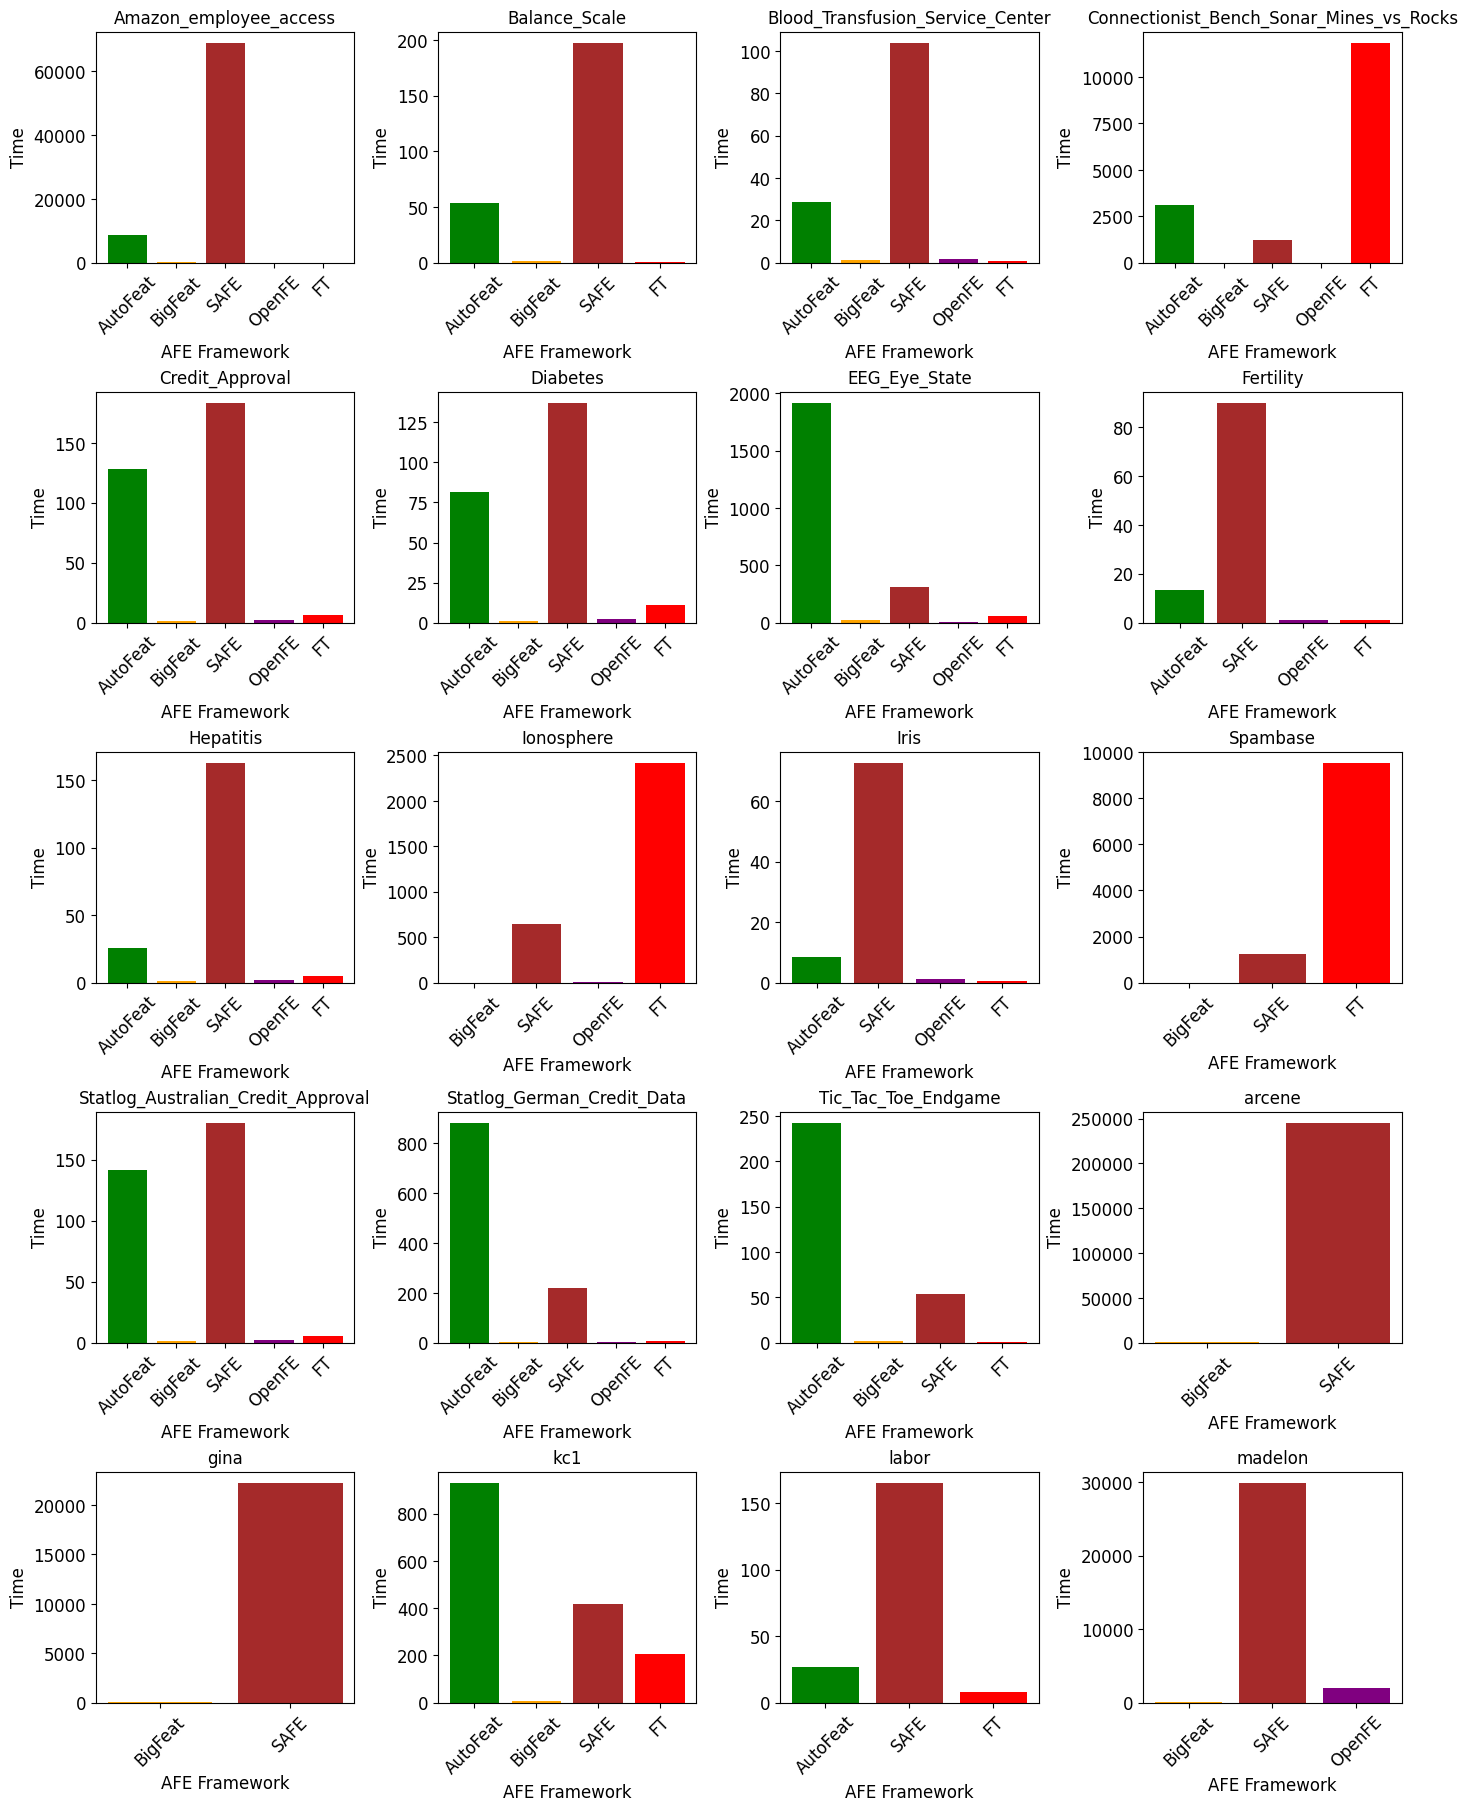

In [76]:
classification_df.rename(columns={
    'Average Time_AutoFeat': 'AutoFeat',
    'Average Time_BigFeat': 'BigFeat',
    'Average Time_SAFE': 'SAFE',
    'Average Time_OpenFE': 'OpenFE',
    'Average Time_FeatureTools': 'FT',
    'DataFrame':'Dataframe'
}, inplace=True)

# Define a color map for the feature engineering methods
colors = {
    'Base': 'royalblue',
    'BigFeat': 'orange',
    'AutoFeat': 'green',
    'FT': 'red',
    'OpenFE': 'purple',
    'SAFE': 'brown'
}


# Create the 7x6 grid of plots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(14, 18), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each dataframe row in its own subplot
for i, (idx, row) in enumerate(classification_df.iterrows()):
    ax = axes[i]
    valid_columns = [col for col in classification_df.columns[1:] if not np.isnan(row[col])]
    valid_colors = [colors[col] for col in valid_columns]  # Extract colors for valid columns only
    valid_values = [row[col] for col in valid_columns]     # Extract values for valid columns only
    
    # Plotting the bar chart with color mapping
    ax.bar(valid_columns, valid_values, color=valid_colors)
    ax.set_title(row['Dataframe'], fontsize=12)
    ax.set_xticks(range(len(valid_columns)))
    ax.set_xticklabels(valid_columns, rotation=45, fontsize=12)
    ax.set_ylabel('Time', fontsize=12)
    ax.set_xlabel('AFE Framework', fontsize=12)

# Hide any unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Save the figure as a PDF
plt.savefig('../Diagrams/fig16_A.pdf', bbox_inches='tight')

plt.show()


C:\Users\25644574\AppData\Local\Temp\ipykernel_13972\3866204790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_df.rename(columns={


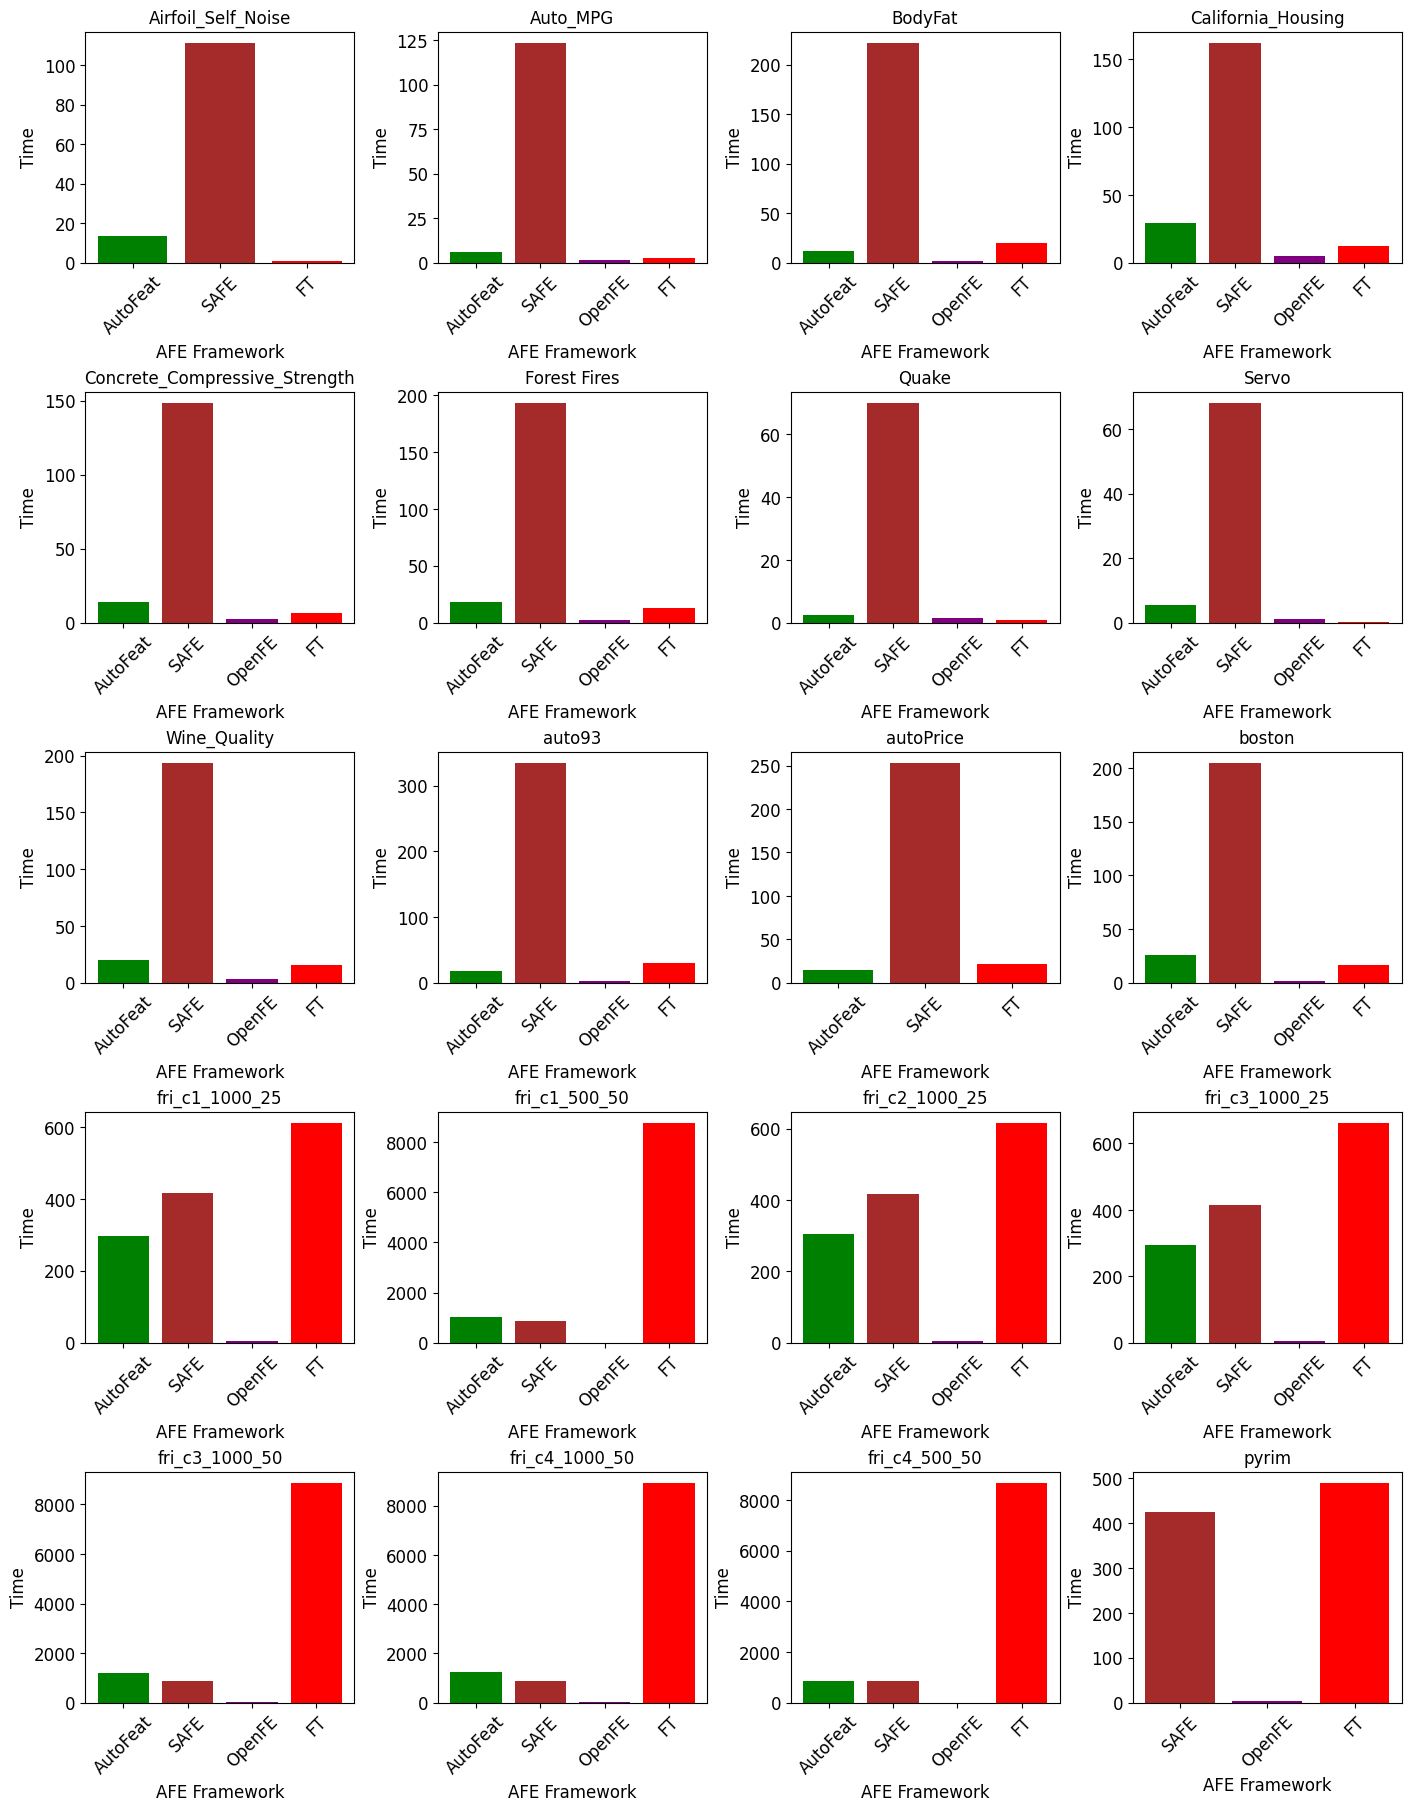

In [77]:
regression_df.rename(columns={
    'Average Time_AutoFeat': 'AutoFeat',
    'Average Time_BigFeat': 'BigFeat',
    'Average Time_SAFE': 'SAFE',
    'Average Time_OpenFE': 'OpenFE',
    'Average Time_FeatureTools': 'FT',
    'DataFrame':'Dataframe'
}, inplace=True)

del(regression_df['BigFeat'])

# Define a color map for the feature engineering methods
colors = {
    'Base': 'royalblue',
    'AutoFeat': 'green',
    'FT': 'red',
    'OpenFE': 'purple',
    'SAFE': 'brown'
}


# Create the 7x6 grid of plots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(14, 18), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each dataframe row in its own subplot
for i, (idx, row) in enumerate(regression_df.iterrows()):
    ax = axes[i]
    valid_columns = [col for col in regression_df.columns[1:] if not np.isnan(row[col])]
    valid_colors = [colors[col] for col in valid_columns]  # Extract colors for valid columns only
    valid_values = [row[col] for col in valid_columns]     # Extract values for valid columns only
    
    # Plotting the bar chart with color mapping
    ax.bar(valid_columns, valid_values, color=valid_colors)
    ax.set_title(row['Dataframe'], fontsize=12)
    ax.set_xticks(range(len(valid_columns)))
    ax.set_xticklabels(valid_columns, rotation=45, fontsize=12)
    ax.set_ylabel('Time', fontsize=12)
    ax.set_xlabel('AFE Framework', fontsize=12)

# Hide any unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Save the figure as a PDF
plt.savefig('../Diagrams/fig16_B.pdf', bbox_inches='tight')

plt.show()

# Scalability Tests

Preparing the dataframe

In [78]:
merged_time_df.rename(columns={
    'Average Time_AutoFeat': 'AutoFeat',
    'Average Time_BigFeat': 'BigFeat',
    'Average Time_SAFE': 'SAFE',
    'Average Time_OpenFE': 'OpenFE',
    'Average Time_FeatureTools': 'FT',
    'DataFrame':'Dataframe'
}, inplace=True)

# Dropping the unnecessary columns from merged_df_cols
merged_df_cols_simplified = merged_df_cols.drop(columns=['BigFeat', 'AutoFeat', 'FT', 'OpenFE', 'SAFE'])

# Merging the dataframes on 'Dataframe' column
merged_time = pd.merge(merged_time_df, merged_df_cols_simplified, on='Dataframe',how='left')

# Renaming the 'Base' column to 'Columns'
merged_time.rename(columns={'Base': 'Columns'}, inplace=True)

# Define paths and datasets
regression_datasets = [ 'fri_c3_1000_50', 'fri_c2_1000_25', 'fri_c4_500_50', 'fri_c4_1000_50', 'fri_c1_1000_25', 'fri_c1_500_50', 'fri_c3_1000_25', 'auto93', 'pyrim', 'autoPrice', 'boston', 'Concrete_Compressive_Strength', 'Auto_MPG', 'Forest Fires', 'Servo', 'Airfoil_Self_Noise', 'Wine_Quality', 'BodyFat', 'California_Housing', 'Quake']

# Creating merged_time_regression by filtering rows where 'Dataframe' is in regression_datasets
merged_time_regression = merged_time[merged_time['Dataframe'].isin(regression_datasets)]

# Creating merged_time_classification by filtering rows where 'Dataframe' is not in regression_datasets
merged_time_classification = merged_time[~merged_time['Dataframe'].isin(regression_datasets)]

# Dropping the 'BigFeat' column from merged_time_classification
merged_time_regression.drop(columns=['BigFeat'], inplace=True)

# Sorting the dataframes by 'Columns' in increasing order
merged_time_classification = merged_time_classification.sort_values(by='Columns')
merged_time_regression = merged_time_regression.sort_values(by='Columns')

C:\Users\25644574\AppData\Local\Temp\ipykernel_13972\188170722.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_time_regression.drop(columns=['BigFeat'], inplace=True)


Reset the indices

In [79]:
# Reset the index of the filtered DataFrame
merged_time_classification = merged_time_classification.reset_index(drop=True)
merged_time_regression = merged_time_regression.reset_index(drop=True)

Estimating missing values

In [80]:
#Store copies for comparison
merged_time_classification_real = merged_time_classification.copy()
merged_time_regression_real = merged_time_regression.copy()

In [81]:
# Function to impute missing values based on linear regression
def impute_with_regression(df, predictor, target):
    # Filter out rows where target column is not NaN
    not_null_data = df[df[target].notna()]
    null_data = df[df[target].isna()]
    
    if not null_data.empty:
        # Prepare training data
        X_train = not_null_data[[predictor]]
        y_train = not_null_data[target]
        
        # Fit model
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # Predict missing values
        X_pred = null_data[[predictor]]
        predicted_values = model.predict(X_pred)
        
        # Fill missing values in the dataframe
        df.loc[df[target].isna(), target] = predicted_values

    return df

# Applying the function to each column with missing values
for column in ['AutoFeat', 'SAFE', 'OpenFE', 'FT']:
    df = impute_with_regression(merged_time_regression, 'Columns', column)

# Applying the function to each column with missing values
for column in ['AutoFeat', 'BigFeat','SAFE', 'OpenFE', 'FT']:
    df = impute_with_regression(merged_time_classification, 'Columns', column)

Plotting the time graphs

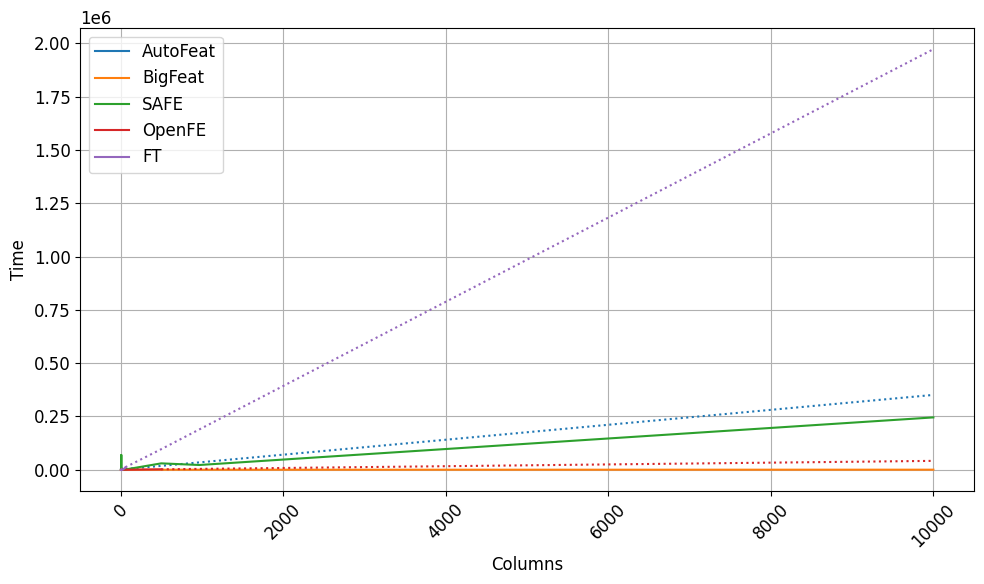

In [82]:
def plot_data(df, title, name):
    plt.figure(figsize=(10, 6))

    # Define the change points
    auto_feat_change = 60
    ft_change = 60
    open_fe_change = 500

    # AutoFeat line
    auto_feat_mask = df['Columns'] <= auto_feat_change
    auto_feat_continuation_mask = df['Columns'] > auto_feat_change-0.5
    plt.plot(df['Columns'][auto_feat_mask], df['AutoFeat'][auto_feat_mask], label='AutoFeat', linestyle='-', color='tab:blue')
    plt.plot(df['Columns'][auto_feat_continuation_mask], df['AutoFeat'][auto_feat_continuation_mask], linestyle=':', color='tab:blue')

    # BigFeat line
    plt.plot(df['Columns'], df['BigFeat'], label='BigFeat', linestyle='-', color='tab:orange')

    # SAFE line
    plt.plot(df['Columns'], df['SAFE'], label='SAFE', linestyle='-', color='tab:green')

    # OpenFE line
    open_fe_mask = df['Columns'] <= open_fe_change
    open_fe_continuation_mask = df['Columns'] > open_fe_change-0.5
    plt.plot(df['Columns'][open_fe_mask], df['OpenFE'][open_fe_mask], label='OpenFE', linestyle='-', color='tab:red')
    plt.plot(df['Columns'][open_fe_continuation_mask], df['OpenFE'][open_fe_continuation_mask], linestyle=':', color='tab:red')

    # FT line
    ft_mask = df['Columns'] <= ft_change
    ft_continuation_mask = df['Columns'] > ft_change-0.5
    plt.plot(df['Columns'][ft_mask], df['FT'][ft_mask], label='FT', linestyle='-', color='tab:purple')
    plt.plot(df['Columns'][ft_continuation_mask], df['FT'][ft_continuation_mask], linestyle=':', color='tab:purple')

    plt.xlabel('Columns')
    plt.ylabel('Time')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels
    
    # Save the figure as a PDF
    plt.savefig(f'../Diagrams/{name}.pdf', bbox_inches='tight')
    plt.show()

# Example usage
plot_data(merged_time_classification, 'Time taken with respect to the number of columns', 'fig17')


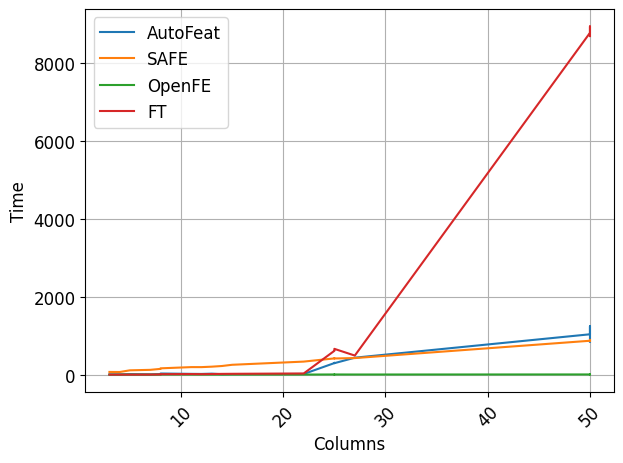

In [83]:
# Set all font sizes to 12
plt.rcParams.update({'font.size': 12})

# Function to create a plot for a given dataframe
def plot_data(df, title,name):
    # plt.figure(figsize=(10, 6))
    plt.plot(df['Columns'], df['AutoFeat'], label='AutoFeat')
    # plt.plot(df['Columns'], df['BigFeat'], label='BigFeat')
    plt.plot(df['Columns'], df['SAFE'], label='SAFE')
    plt.plot(df['Columns'], df['OpenFE'], label='OpenFE')
    plt.plot(df['Columns'], df['FT'], label='FT')
    
    # plt.title(title)
    plt.xlabel('Columns')
    plt.ylabel('Time')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels
    
    # Save the figure as a PDF
    plt.savefig(f'../Diagrams/{name}.pdf', bbox_inches='tight')
    plt.show()

# Plotting for merged_time_classification
plot_data(merged_time_regression, 'Time taken with respect to the number of columns','fig18')



# Robustness of AFE Frameworks

Get the data

In [84]:
merged_df = merged_df_copy.copy()
merged_df_regression = merged_df__regression_copy.copy()

Evaluating - classification scenario

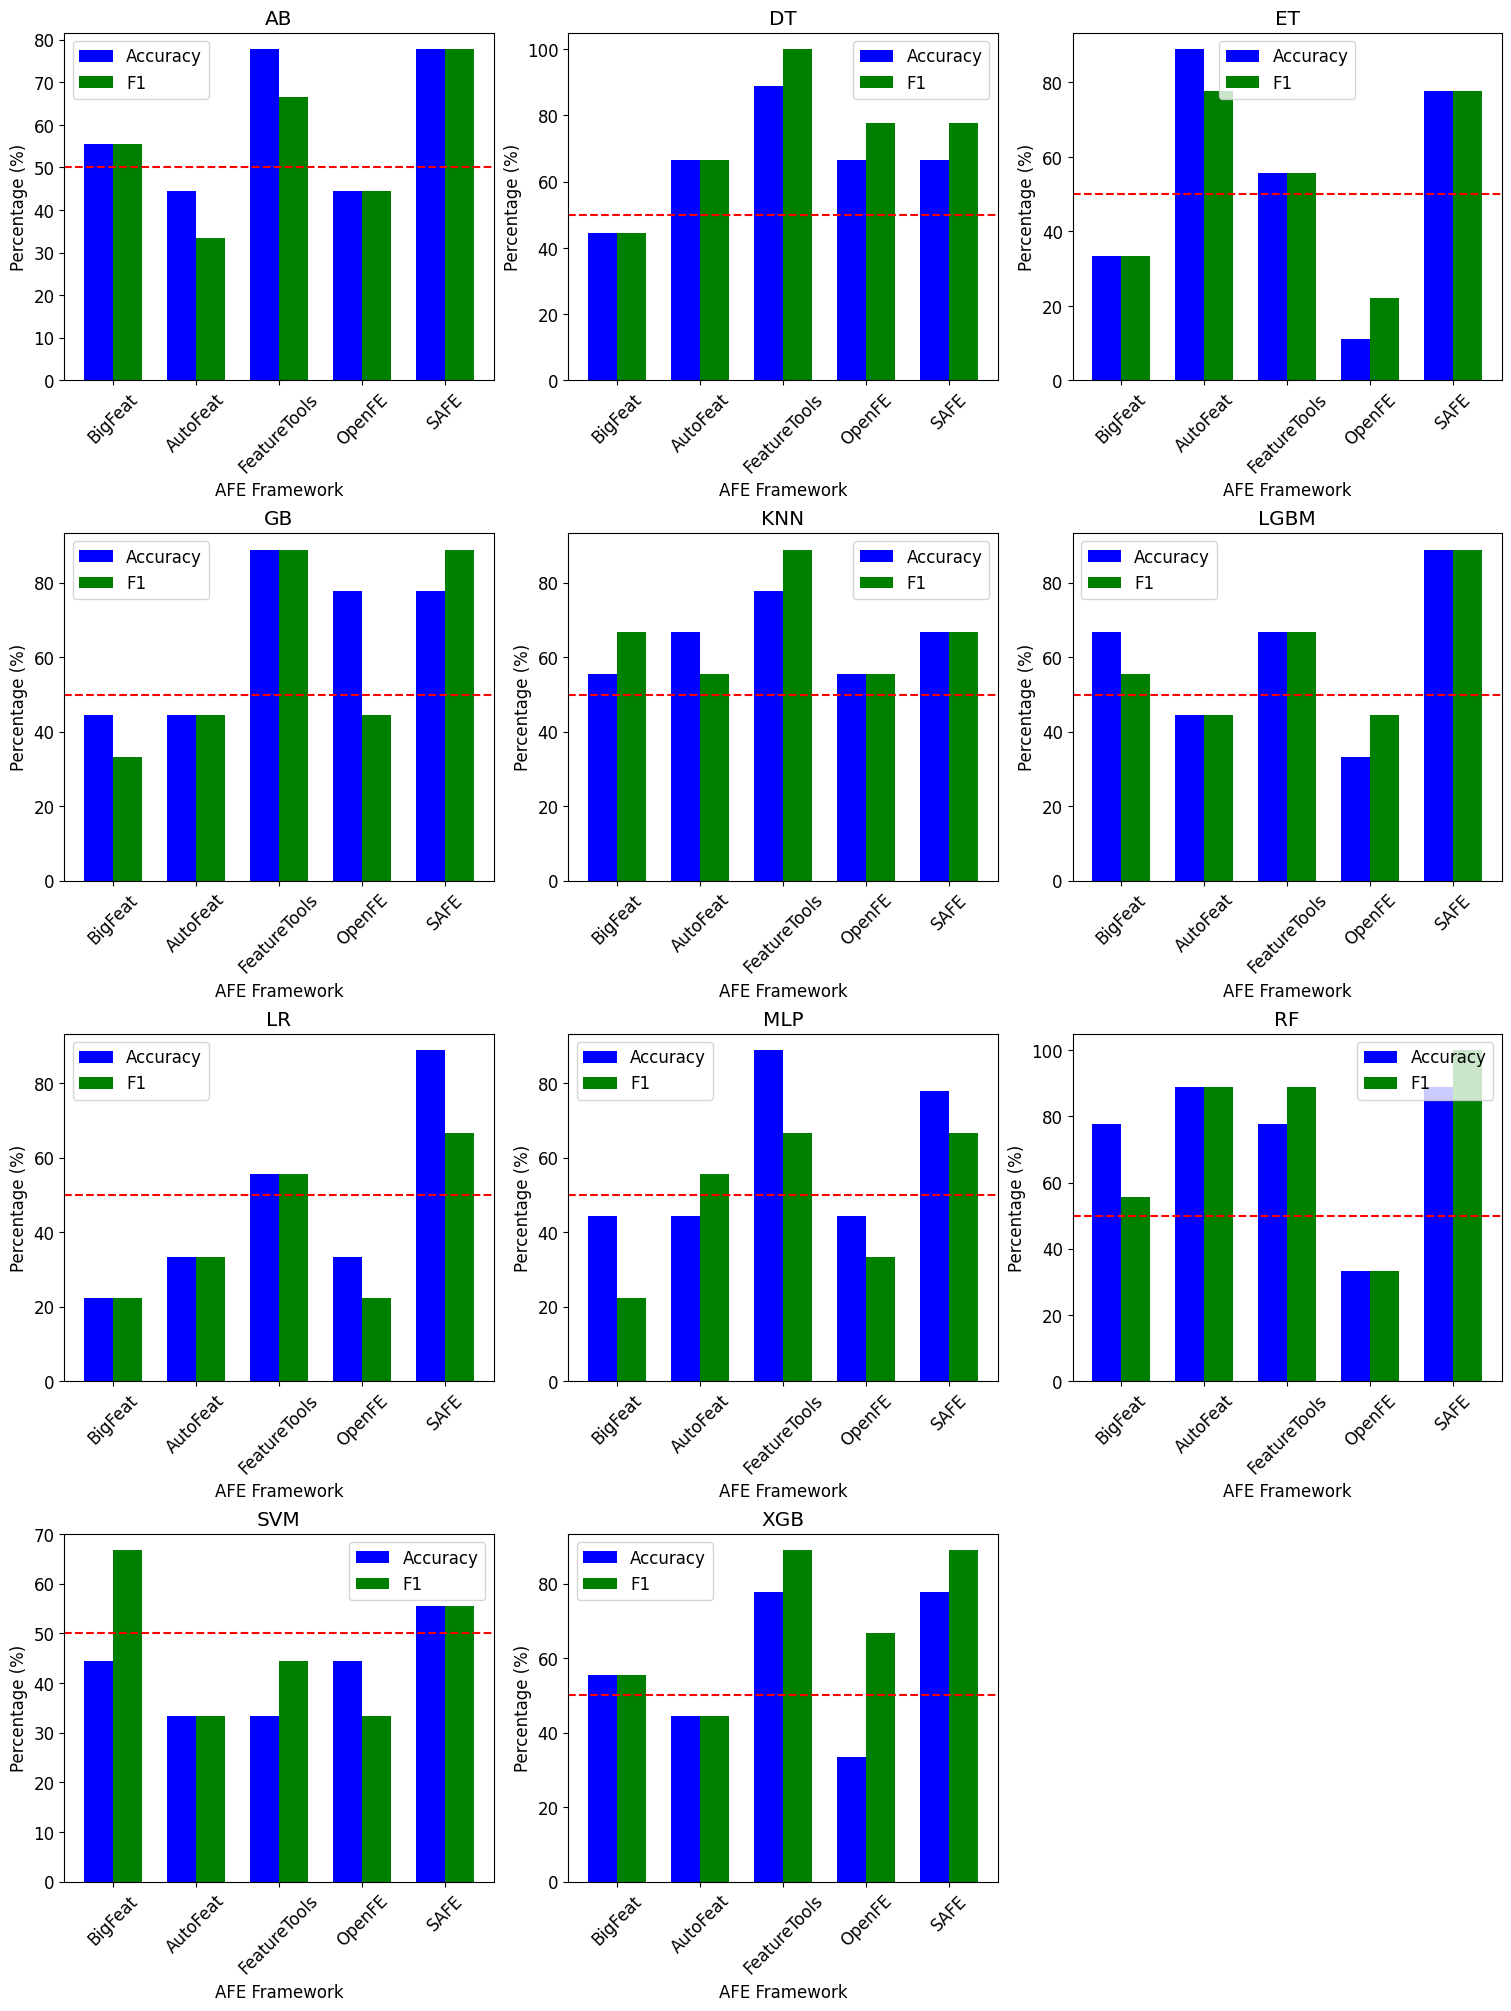

In [86]:
# Define accuracy and F1 columns
accuracy_columns = ['Accuracy_BigFeat', 'Accuracy_AutoFeat', 'Accuracy_FeatureTools', 'Accuracy_OpenFE', 'Accuracy_SAFE']
f1_columns = ['F1_BigFeat', 'F1_AutoFeat', 'F1_FeatureTools', 'F1_OpenFE', 'F1_SAFE']

# Drop rows with missing values in the specified columns
merged_df.dropna(subset=accuracy_columns + f1_columns + ['Accuracy', 'F1'], inplace=True)

framework_names_classification = ['BigFeat', 'AutoFeat', 'FeatureTools', 'OpenFE', 'SAFE']

# Function to calculate performance data for a specific model
def process_data_for_model(df, model_name):
    df_model = df[df['Model'] == model_name]
    performance_data = {'Accuracy': [], 'F1': []}
    
    for col in accuracy_columns:
        percentage_less = np.mean(df_model[col] < df_model['Accuracy']) * 100
        performance_data['Accuracy'].append(percentage_less)
    
    for col in f1_columns:
        percentage_less = np.mean(df_model[col] < df_model['F1']) * 100
        performance_data['F1'].append(percentage_less)
    
    return performance_data

# Plotting all models on a 4x3 grid
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20), constrained_layout=True)
models = merged_df['Model'].unique()

for ax, model in zip(axes.flatten(), models):
    perf_data = process_data_for_model(merged_df, model)
    
    index = np.arange(len(framework_names_classification))
    bar_width = 0.35

    acc_bars = ax.bar(index - bar_width/2, perf_data['Accuracy'], bar_width, label='Accuracy', color='blue')
    f1_bars = ax.bar(index + bar_width/2, perf_data['F1'], bar_width, label='F1', color='green')

    ax.axhline(50, color='red', linestyle='--')
    ax.set_title(model)
    ax.set_xlabel('AFE Framework')
    ax.set_ylabel('Percentage (%)')
    ax.set_xticks(index)
    ax.set_xticklabels(framework_names_classification, rotation=45)
    ax.legend()

# Hide unused subplots if there are fewer models than subplots
for i in range(len(models), 12):
    axes.flatten()[i].axis('off')

# Save the figure as a PDF
plt.savefig('../Diagrams/fig21.pdf', bbox_inches='tight')

plt.show()


Regression Scenario

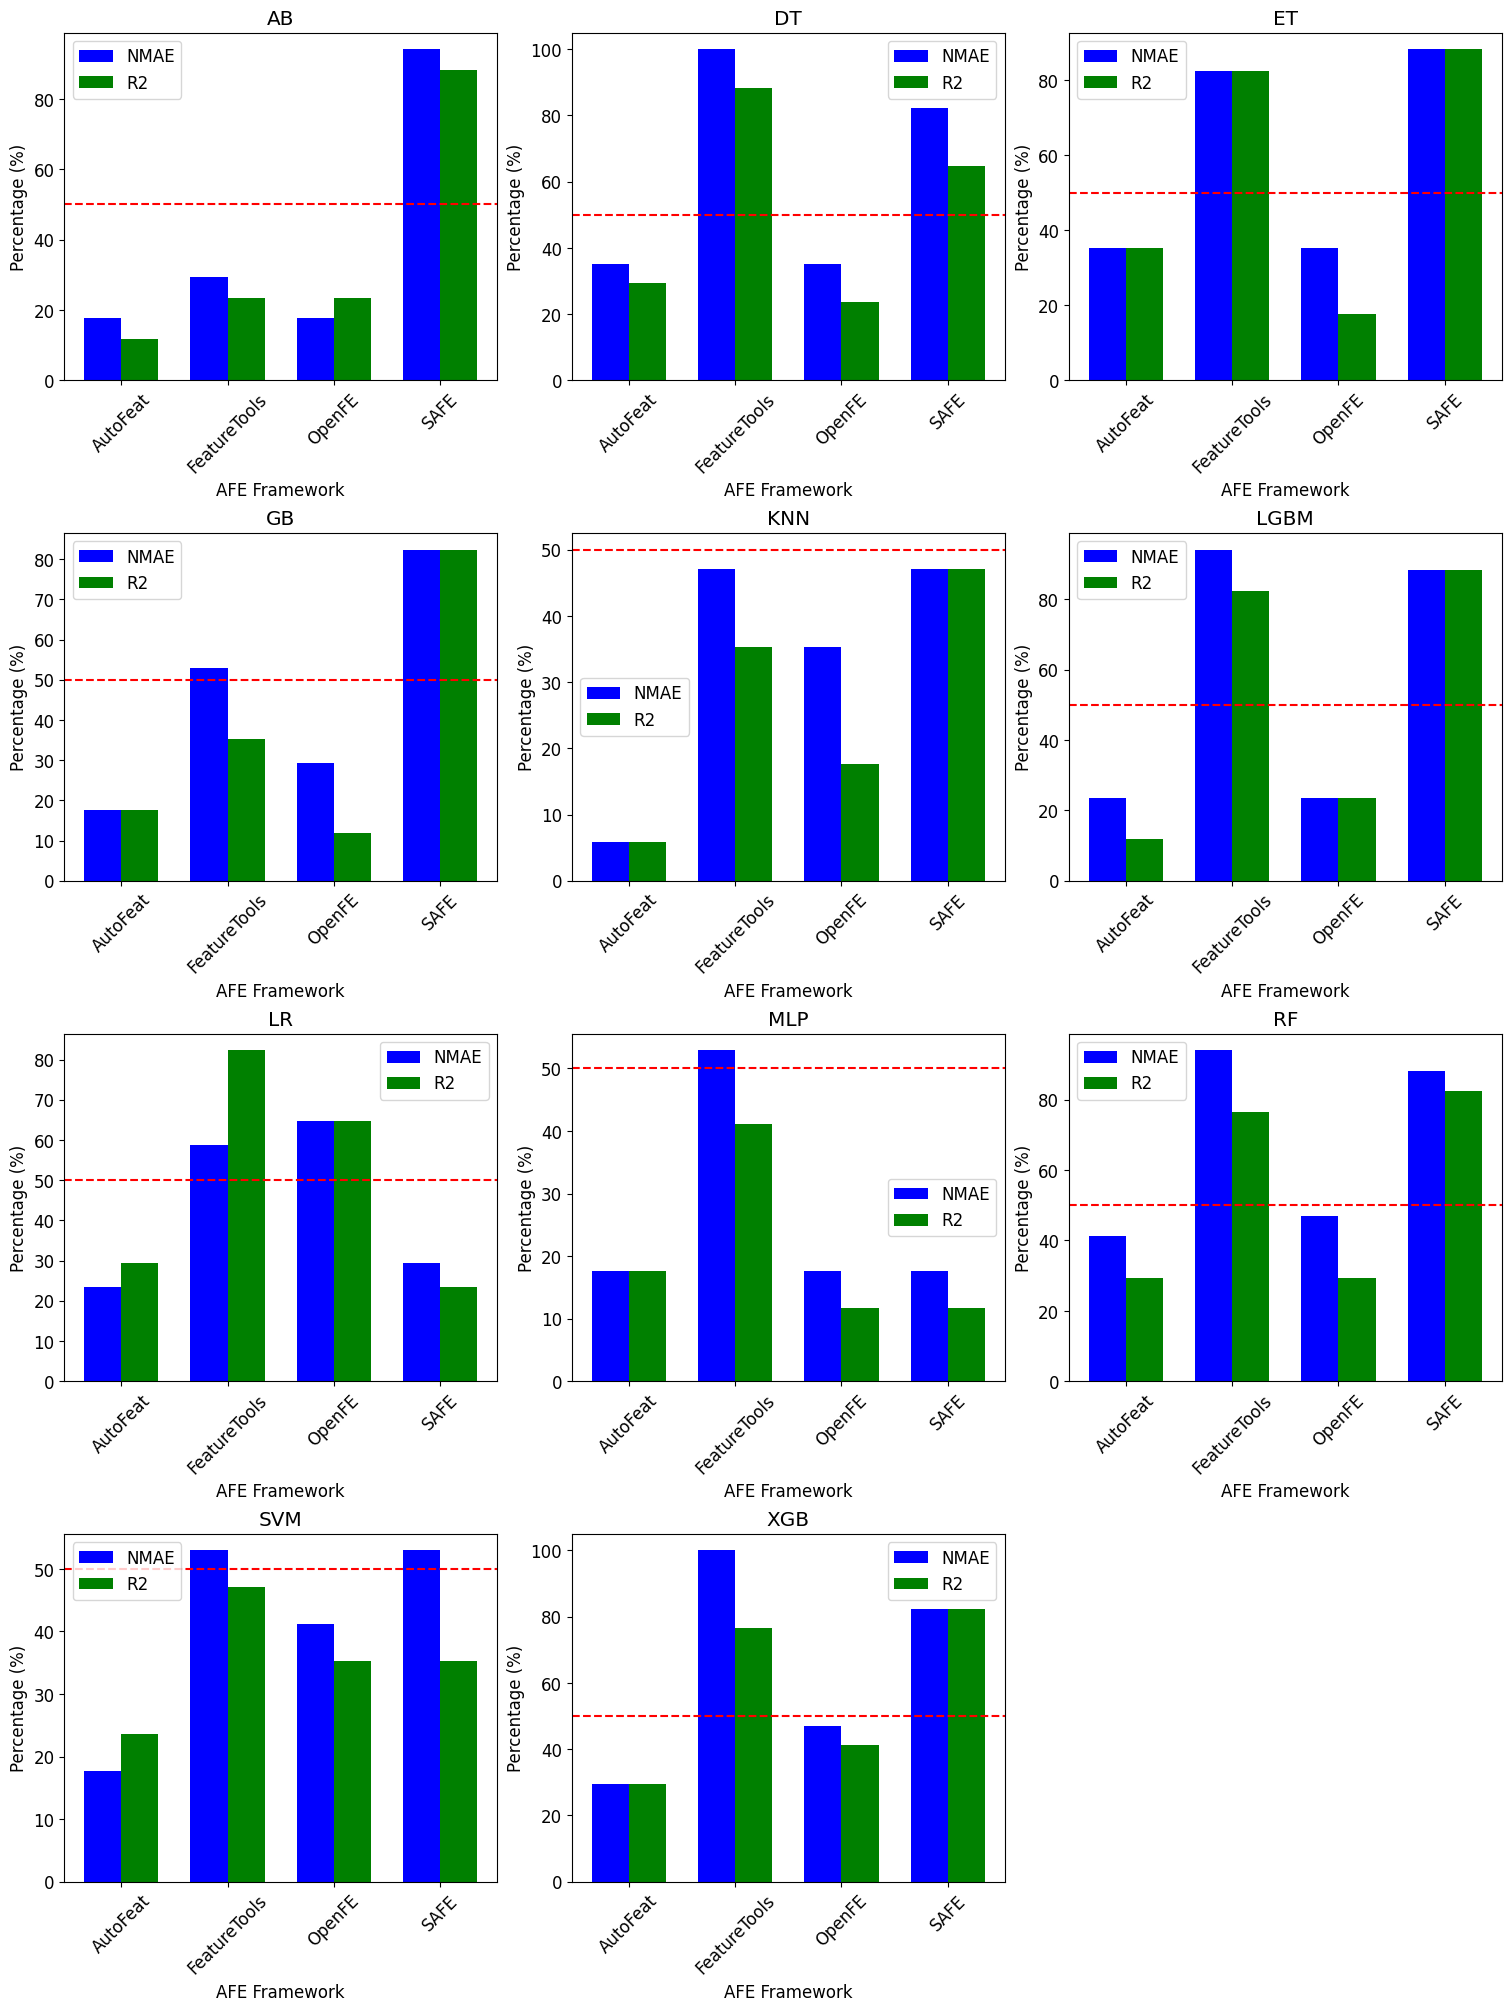

In [87]:
# Define NMAE and R2 columns
NMAE_columns = ['NMAE_AutoFeat', 'NMAE_FeatureTools', 'NMAE_OpenFE', 'NMAE_SAFE']
r2_columns = ['R2_AutoFeat', 'R2_FeatureTools', 'R2_OpenFE', 'R2_SAFE']
framework_names_regression = ['AutoFeat', 'FeatureTools', 'OpenFE', 'SAFE']

# Drop rows with missing values in the specified columns
merged_df_regression.dropna(subset=NMAE_columns + r2_columns + ['NMAE', 'R2'], inplace=True)

# Function to calculate performance data for a specific model
def process_data_for_model(df, model_name):
    df_model = df[df['Model'] == model_name]
    performance_data = {'NMAE': [], 'R2': []}
    
    for col in NMAE_columns:
        percentage_worse_NMAE = np.mean(df_model[col] > df_model['NMAE']) * 100
        performance_data['NMAE'].append(percentage_worse_NMAE)
    
    for col in r2_columns:
        percentage_worse_r2 = np.mean(df_model[col] < df_model['R2']) * 100
        performance_data['R2'].append(percentage_worse_r2)
    
    return performance_data

# Plotting all models on a 4x3 grid
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20), constrained_layout=True)
models = merged_df_regression['Model'].unique()

for ax, model in zip(axes.flatten(), models):
    perf_data = process_data_for_model(merged_df_regression, model)
    
    index = np.arange(len(framework_names_regression))
    bar_width = 0.35

    NMAE_bars = ax.bar(index - bar_width/2, perf_data['NMAE'], bar_width, label='NMAE', color='blue')
    r2_bars = ax.bar(index + bar_width/2, perf_data['R2'], bar_width, label='R2', color='green')

    ax.axhline(50, color='red', linestyle='--')
    ax.set_title(model)
    ax.set_xlabel('AFE Framework')
    ax.set_ylabel('Percentage (%)')
    ax.set_xticks(index)
    ax.set_xticklabels(framework_names_regression, rotation=45)
    ax.legend()

# Hide unused subplots if there are fewer models than subplots
for i in range(len(models), 12):
    axes.flatten()[i].axis('off')

# Save the figure as a PDF
plt.savefig('../Diagrams/fig22.pdf', bbox_inches='tight')

plt.show()
